In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import math

In [2]:
import scipy.signal as signal
def lpf(data,sampling_rate,fp,fs):
  '''
  data # 変換するデータ：np.array形式
  sampling_rate # 計測したサンプリングレート：int
  fp # 通過域端周波数[Hz]:int
  fs # 阻止域端周波数[Hz]:int
  '''
  n=len(data)
  dt=1/sampling_rate
  fn=1/(2*dt)
  gpass = 1  # 通過域最大損失量[dB]
  gstop = 40  # 阻止域最小減衰量[dB]
  # 正規化
  Wp = fp/fn
  Ws = fs/fn
  N, Wn = signal.buttord(Wp, Ws, gpass, gstop)
  b1, a1 = signal.butter(N, Wn, 'low')
  return signal.filtfilt(b1, a1, data) #0 paddingしない場合

def hpf(data,sampling_rate,fp,fs):
  '''
  data # 変換するデータ：np.array形式
  sampling_rate # 計測したサンプリングレート：int
  fp # 通過域端周波数[Hz]:int
  fs # 阻止域端周波数[Hz]:int
  '''
  n=len(data)
  dt=1/sampling_rate
  fn=1/(2*dt)
  gpass = 1  # 通過域最大損失量[dB]
  gstop = 40  # 阻止域最小減衰量[dB]
  # 正規化
  Wp = fp/fn
  Ws = fs/fn
  N, Wn = signal.buttord(Wp, Ws, gpass, gstop)
  b1, a1 = signal.butter(N, Wn, 'high')
  return signal.filtfilt(b1, a1, data) #0 paddingしない場合

# fanctions
def myfft(data,sample_rate):
  '''
  calc fft, Amp and Phase
  '''
  F = np.fft.fft(data)
  N = len(data)
  Amp = np.abs(F/(N/2)) 
  Phase = np.degrees(np.angle(F))
  t = np.linspace(0,len(data),len(data))/sample_rate
  freq = np.linspace(0,sample_rate,len(data))
  return F,Amp,Phase,t,freq


def view_single_fft(data,sample_rate):
  '''
  指定した軸のFFTの結果を可視化する
  '''
  F,Amp,Phase,t,freq = myfft(data,sample_rate)
  # グラフ表示
  fig,ax = plt.subplots(3,1,figsize=(12,9))
  ax[0].plot(t, data, label='f(n)')
  ax[0].set_xlabel("Time", fontsize=10)
  ax[0].set_ylabel("Signal", fontsize=10)
#   ax[0].grid()
  ax[1].loglog(freq[:int(len(freq)/2)], Amp[:int(len(freq)/2)], 'b',label='|F(k)|',alpha=0.1)
  ax[1].loglog(freq[:int(len(freq)/2)], Amp[:int(len(freq)/2)], '.',label='|F(k)|',markersize=3)
  ax[1].set_xlabel('Frequency', fontsize=10)
  ax[1].set_ylabel('Amplitude', fontsize=10)
#   ax[1].grid()
  ax[2].semilogx(freq[:int(len(freq)/2)], Phase[:int(len(freq)/2)], 'b',label='|F(k)|',alpha=0.1)
  ax[2].semilogx(freq[:int(len(freq)/2)], Phase[:int(len(freq)/2)], '.',label='|F(k)|',markersize=3)
  ax[2].set_xlabel('Frequency', fontsize=10)
  ax[2].set_ylabel('Phase', fontsize=10)
#   ax[2].grid()
  ax[2].set_ylim(-185,185)
  plt.tight_layout()
  plt.subplots_adjust(top=0.96)
  plt.show()


# 前処理
## データ読み込み

In [3]:
data_path = './data_20200212'
sampling_rate = 20
f_list = sorted(os.listdir(path=data_path))
print(f_list)

['case1_1.csv', 'case1_2.csv', 'case1_3.csv', 'case3_1.csv', 'case3_2.csv', 'case3_3.csv', 'case4_1.csv', 'case4_2.csv', 'case4_3.csv', 'case4_4.csv', 'case4_5.csv']


## 信号処理

In [4]:
df = pd.DataFrame()
for name in f_list:
  print(name)
  df_ = pd.read_csv(data_path+'/'+name)
  for a in df_.columns:
    if(a in ['right', 'left', 'add', 'sub']):
#         df_[a] = lpf(df_[a],sampling_rate,5,6)
        df_[a] = hpf(df_[a],sampling_rate,0.1,0.01)
  df_['data_name']=name
  df_['time'] = np.arange(len(df_))/sampling_rate
  print(df_.head())
  df = pd.concat((df,df_))

case1_1.csv
       right       left  lighting led pin        add        sub  light  \
0  -3.487364   2.211913                 0  -1.275450  -5.699277    150   
1  -1.117312  12.143002                 0  11.025690 -13.260314    150   
2   7.710853   9.187308                 0  16.898161  -1.476455    150   
3  -2.002890   3.004775                 0   1.001885  -5.007665    150   
4 -12.528564  -6.394656                 0 -18.923220  -6.133907    150   

     data_name  time  
0  case1_1.csv  0.00  
1  case1_1.csv  0.05  
2  case1_1.csv  0.10  
3  case1_1.csv  0.15  
4  case1_1.csv  0.20  
case1_2.csv
       right       left  lighting led pin        add        sub  light  \
0  -2.840358  -2.278270                 0  -5.118629  -0.562088    150   
1  -7.396129  -0.854641                 0  -8.250770  -6.541488    150   
2  -0.682630  23.129435                 0  22.446804 -23.812065    150   
3   2.810046  39.054021                 0  41.864067 -36.243975    150   
4 -11.418191   6.639181

case1_1.csv


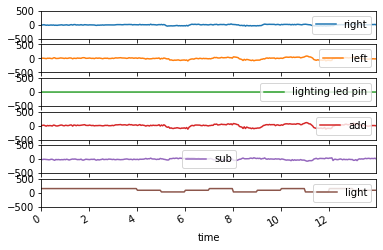

case1_2.csv


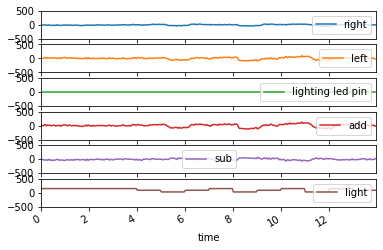

case1_3.csv


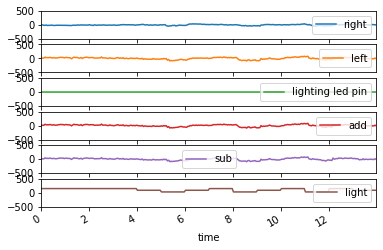

case3_1.csv


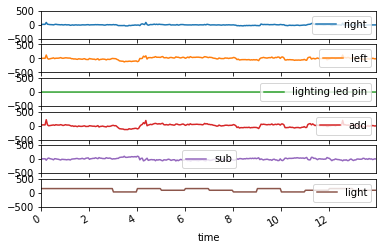

case3_2.csv


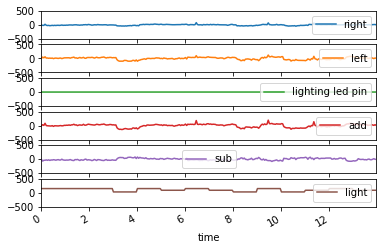

case3_3.csv


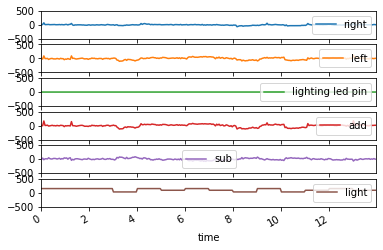

case4_1.csv


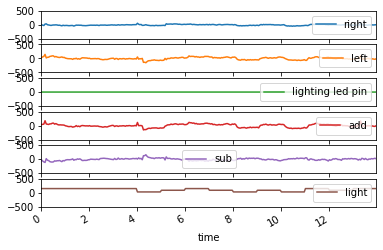

case4_2.csv


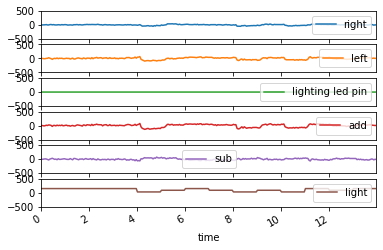

case4_3.csv


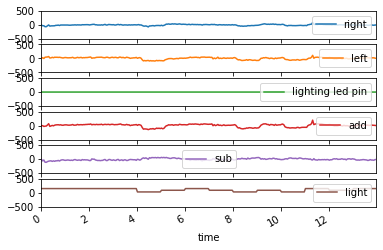

case4_4.csv


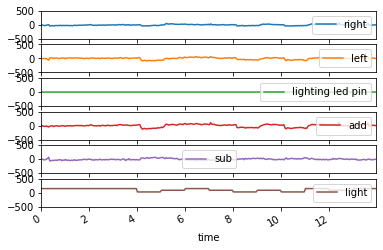

case4_5.csv


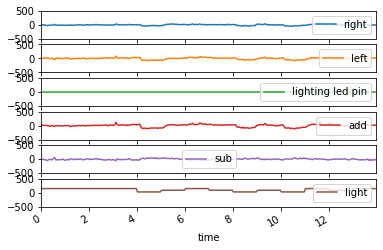

In [5]:
for name in f_list:
  print(name)
  df[df['data_name']==name].plot(x='time',subplots=True,sharey=True,ylim=(-500,500))
  plt.show()

case1_1.csv


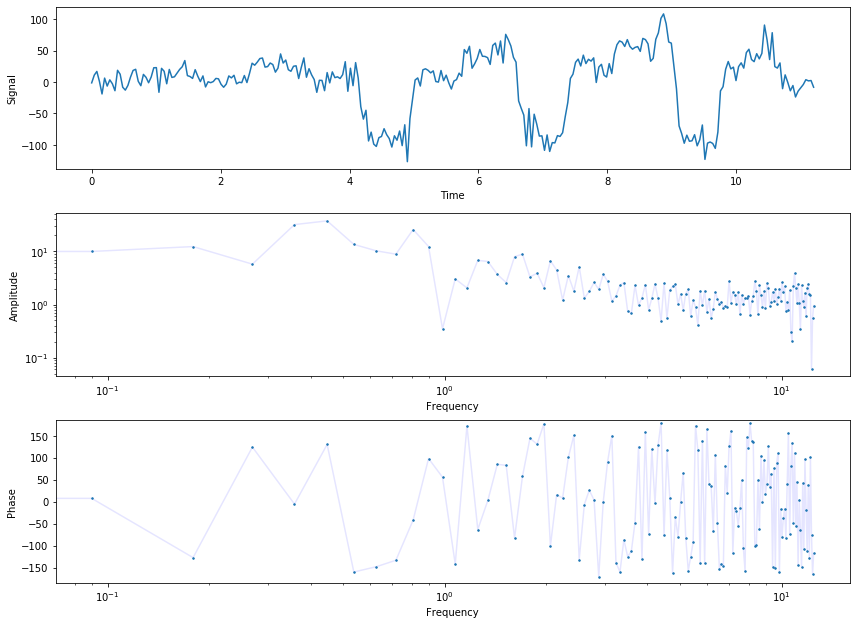

case1_2.csv


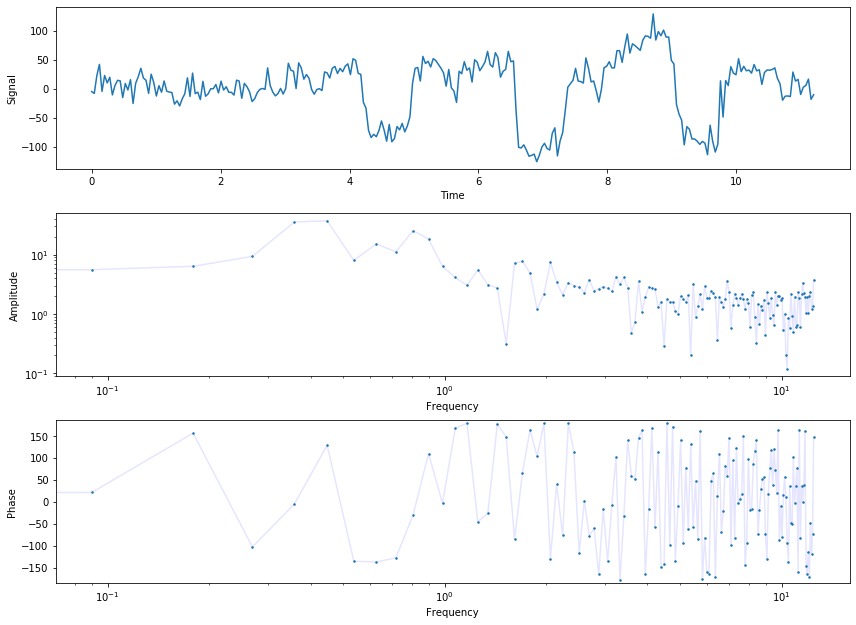

case1_3.csv


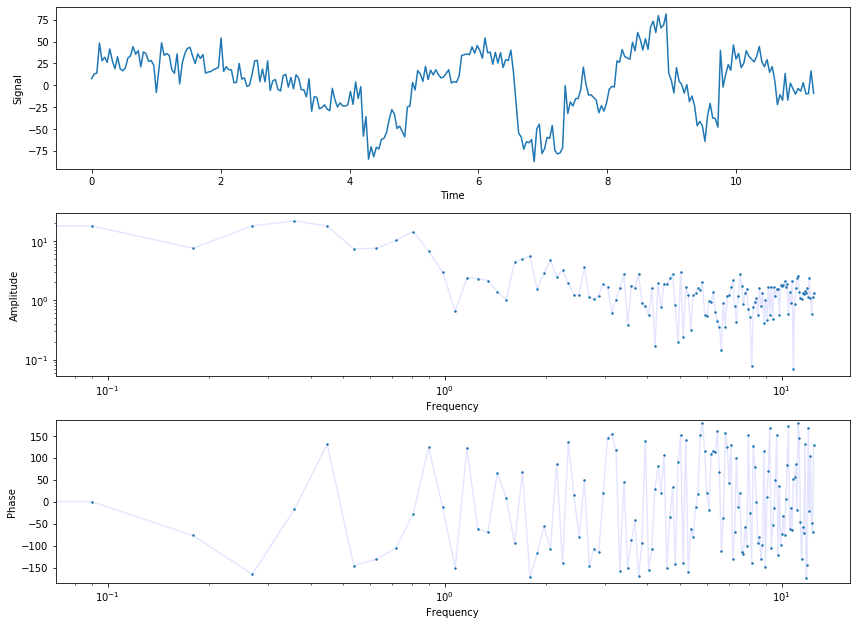

case3_1.csv


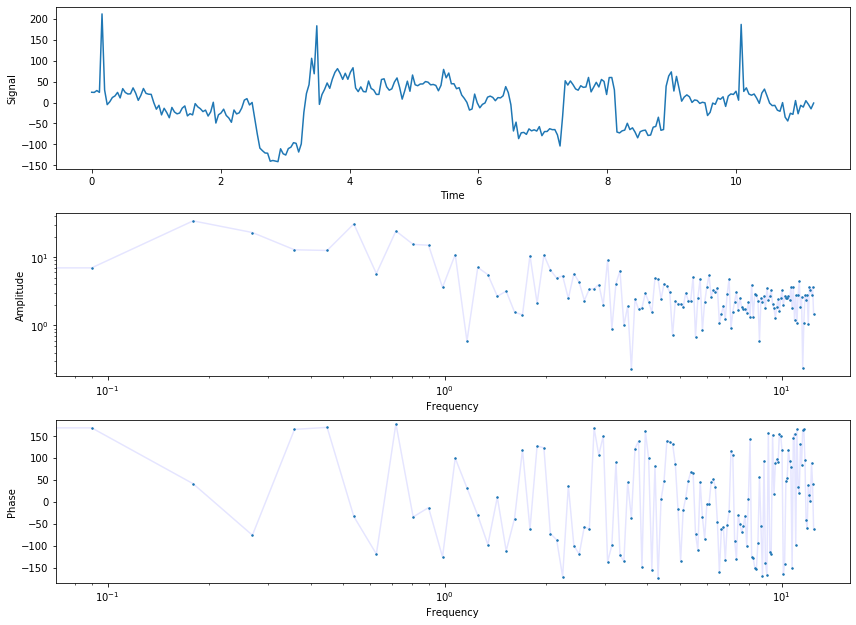

case3_2.csv


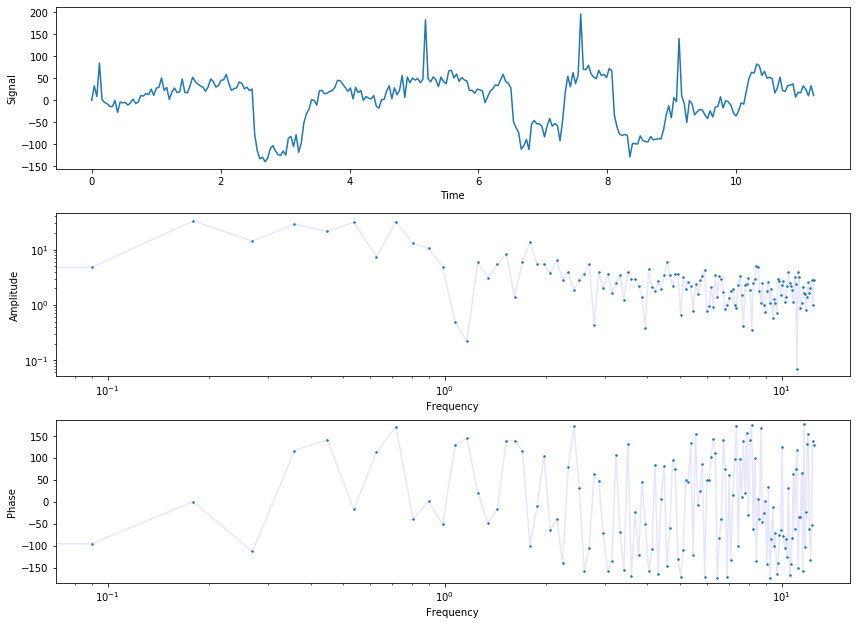

case3_3.csv


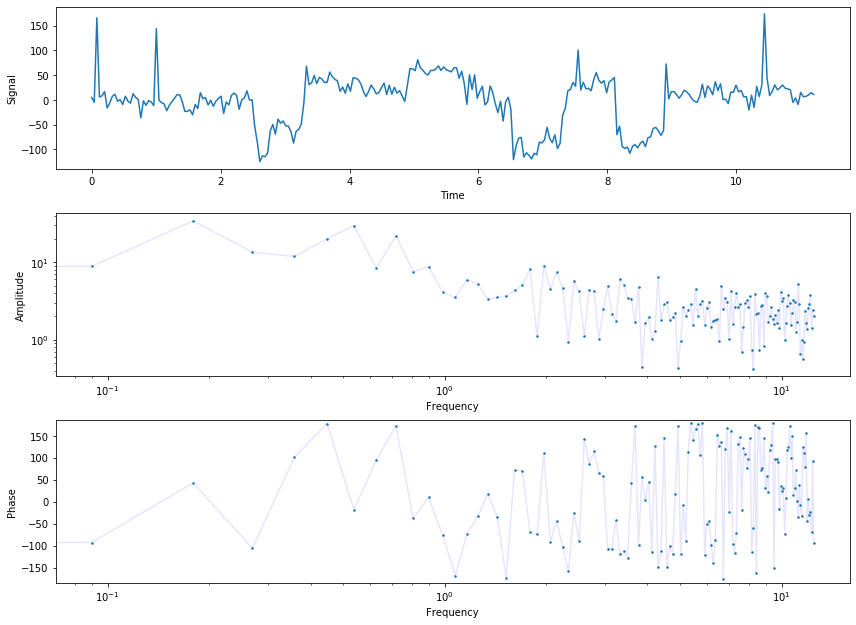

case4_1.csv


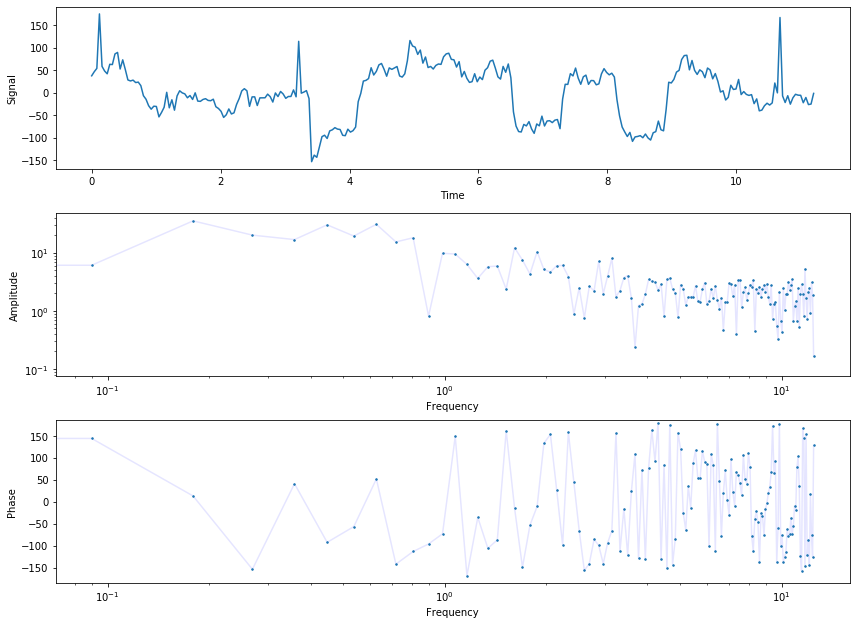

case4_2.csv


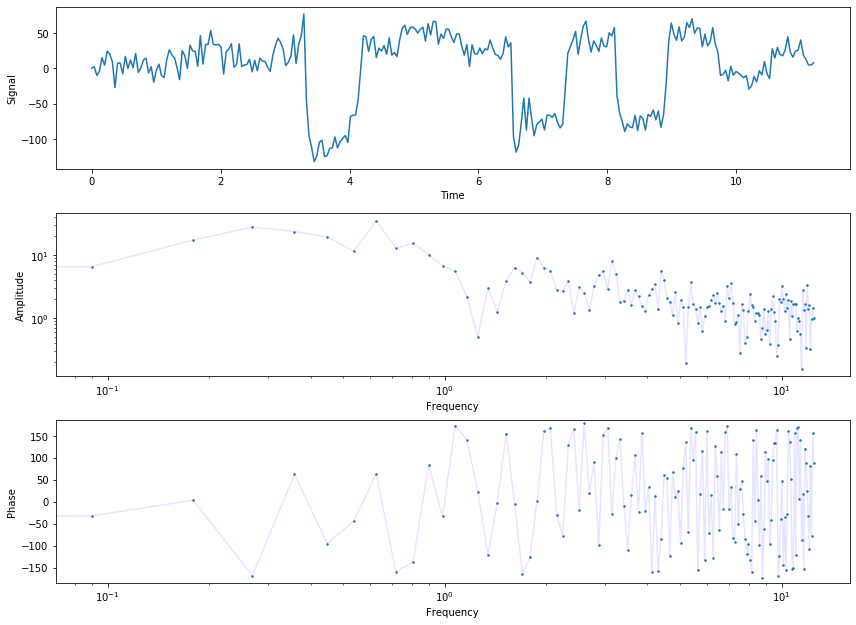

case4_3.csv


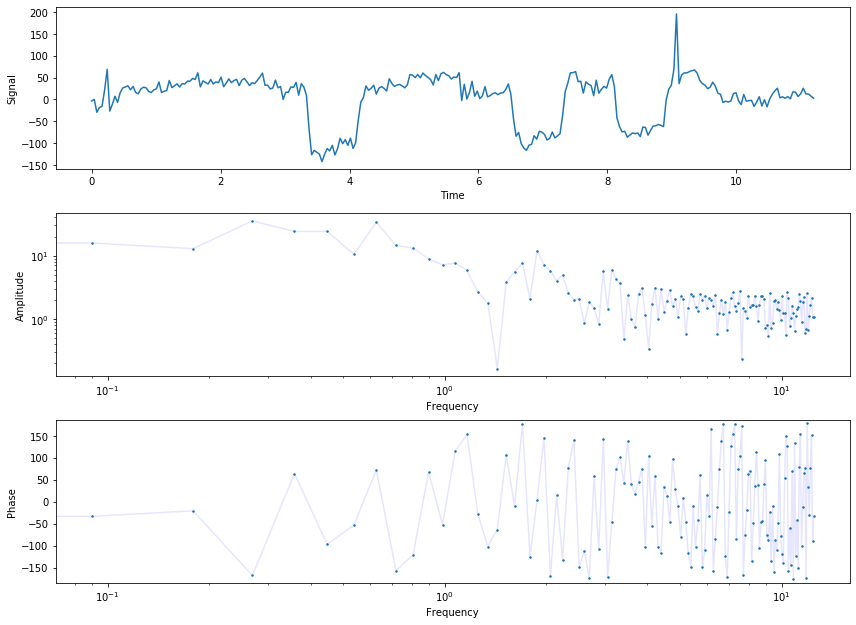

case4_4.csv


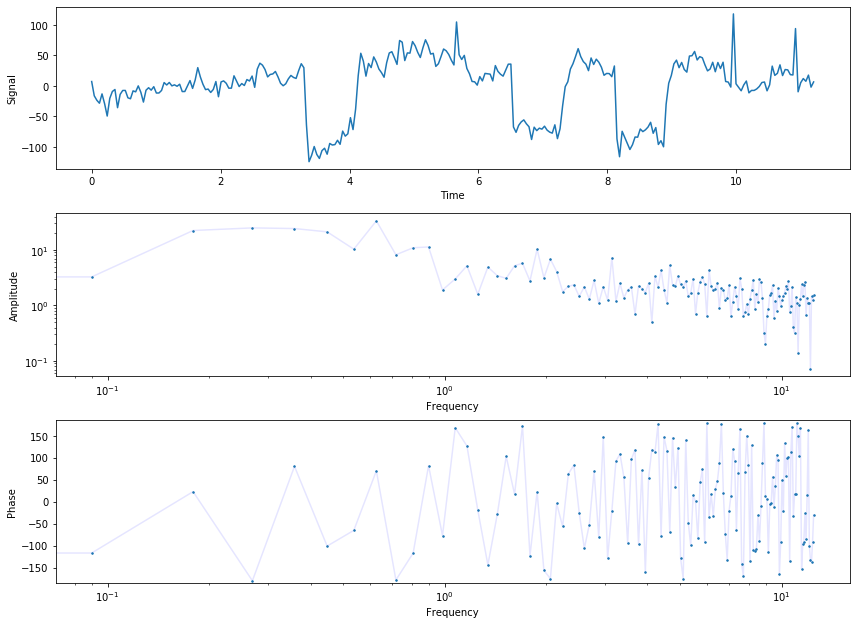

case4_5.csv


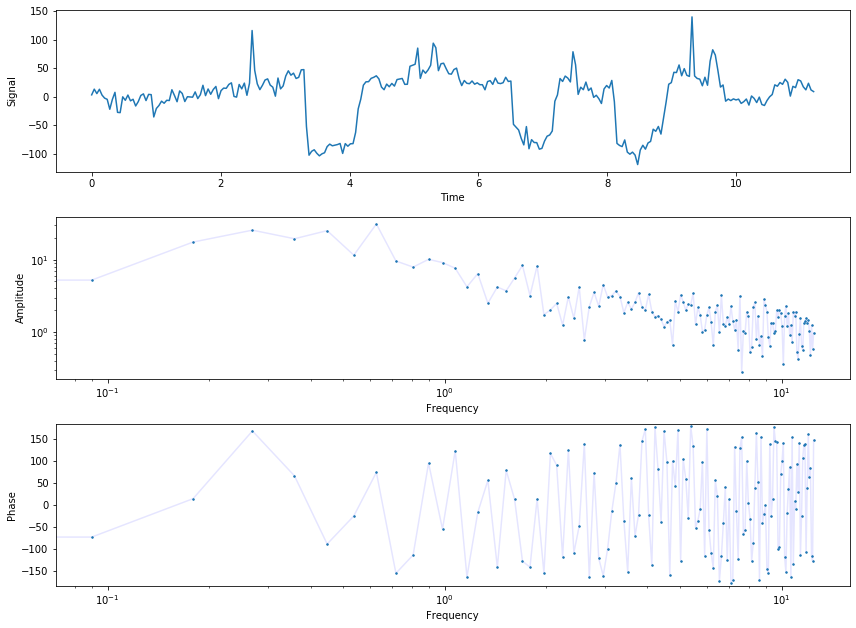

<function __main__.view_single_fft(data, sample_rate)>

In [6]:
for name in f_list:
  print(name)
  view_single_fft(df[df['data_name']==name]['add'],25)
#   df[df['data_name']==name].plot(x='time',subplots=True,sharey=True,ylim=(-500,500))
  plt.show()

view_single_fft

加算の微分結果-----------------------
case1_1.csv


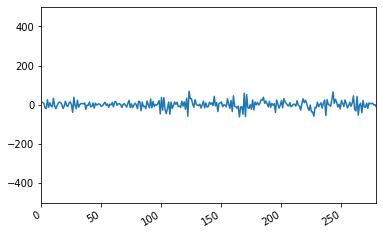

case1_2.csv


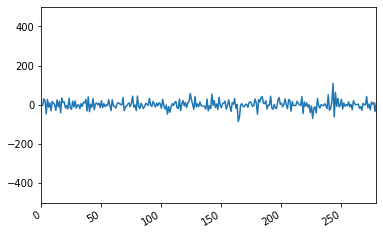

case1_3.csv


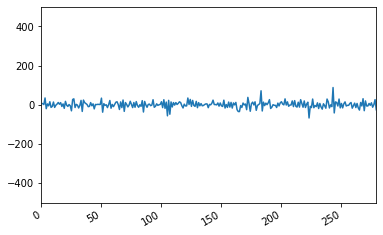

case3_1.csv


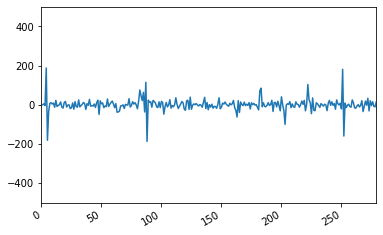

case3_2.csv


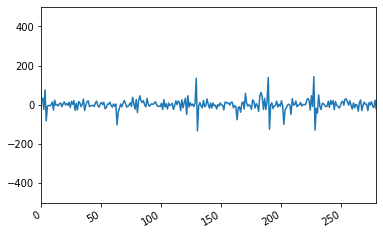

case3_3.csv


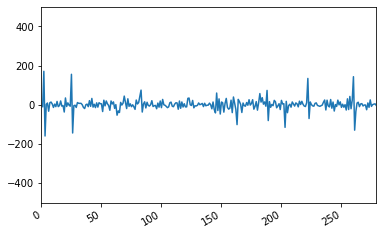

case4_1.csv


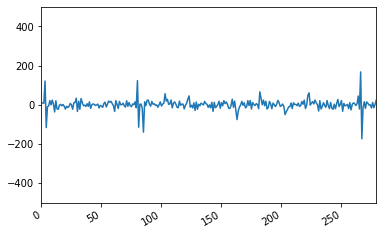

case4_2.csv


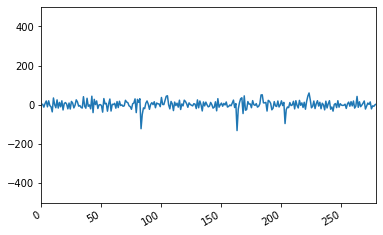

case4_3.csv


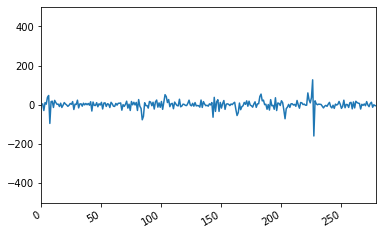

case4_4.csv


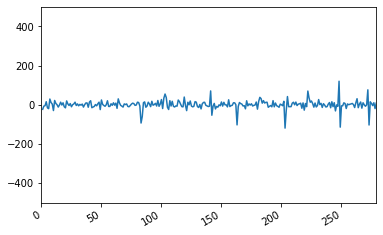

case4_5.csv


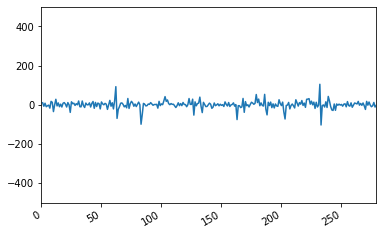

減算の微分結果-----------------------
case1_1.csv


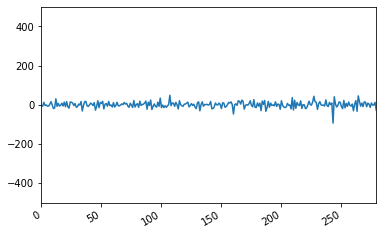

case1_2.csv


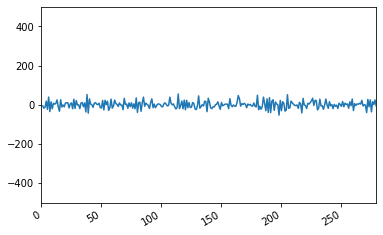

case1_3.csv


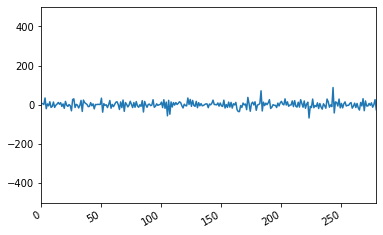

case3_1.csv


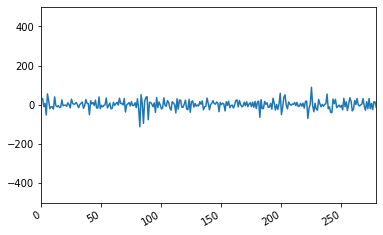

case3_2.csv


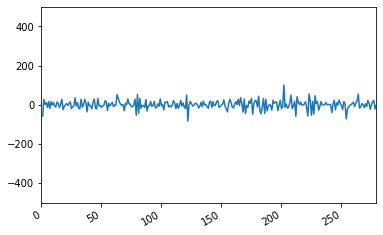

case3_3.csv


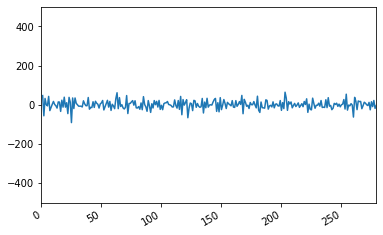

case4_1.csv


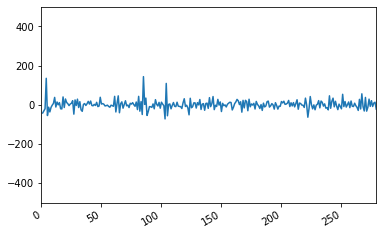

case4_2.csv


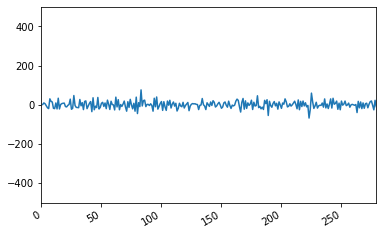

case4_3.csv


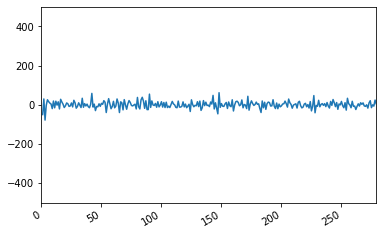

case4_4.csv


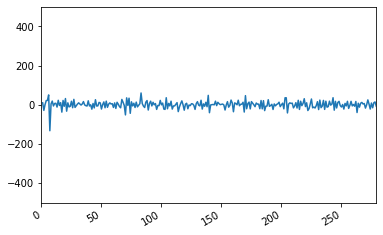

case4_5.csv


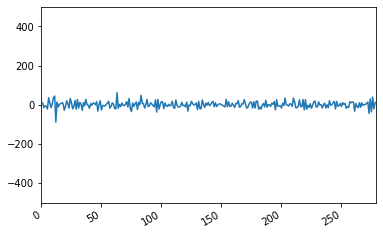

In [7]:
# 微分結果
print('加算の微分結果-----------------------')
for name in f_list:
  print(name)
  df[df['data_name']==name]['add'].diff().plot(x='time',subplots=True,sharey=True,ylim=(-500,500))
  plt.show()
print('減算の微分結果-----------------------')
for name in f_list:
  print(name)
  df[df['data_name']==name]['sub'].diff().plot(x='time',subplots=True,sharey=True,ylim=(-500,500))
  plt.show()

NameError: name 'window_size' is not defined

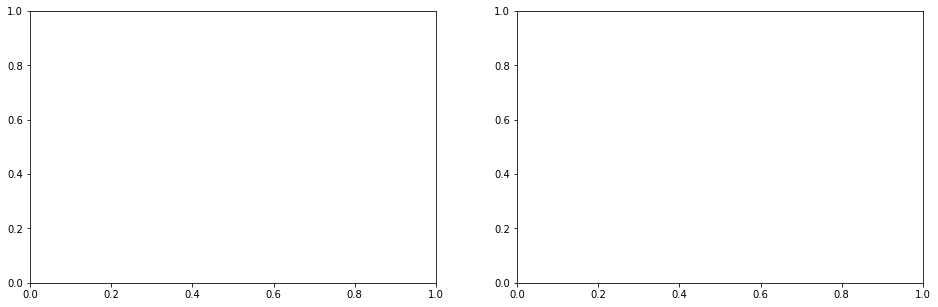

In [8]:
# 積分
fig,ax = plt.subplots(1,2,figsize=(16,5))
for data_name,i in zip(['add','sub'],range(2)):
    for name in f_list:
        amp_data = np.sqrt(df[df['data_name']==name][data_name]**2)
        integrated_data = amp_data.rolling(window_size).sum() / window_size
        data_mean=integrated_data.mean()
        
        if f_dict[name]=='mabataki':
            ax[i].plot(integrated_data,label=f_dict[name],color='red')
            ax[i].plot(df[df['data_name']==name][data_name] + data_mean,label=f_dict[name],color='red',alpha=0.3)
        else:
            ax[i].plot(integrated_data,label=f_dict[name],alpha=0.1,color='black')
    ax[i].set_title(data_name)
    ax[i].legend()
plt.show()

In [ ]:
# 積分
print('加算の積分結果-----------------------')
window_size = 10
result = 0;
for name in f_list:
    print(name)
    df[df['data_name']==name]['add'].rolling(window_size).sum().plot(x='time',subplots=True,sharey=True,ylim=(-1000,1000))
    plt.show()
print('減算の積分結果-----------------------')
window_size = 10
result = 0;
for name in f_list:
    print(name)
    df[df['data_name']==name]['sub'].rolling(window_size).sum().plot(x='time',subplots=True,sharey=True,ylim=(-1000,1000))
    plt.show()

In [9]:
f_dict=dict(zip(f_list, [f.split('.')[0] for f in f_list]))

In [ ]:
# 微分
fig,ax = plt.subplots(1,2,figsize=(16,5))
for data_name,i in zip(['add','sub'],range(2)):
    for name in f_list:
        if f_dict[name]=='near-far':
            amp_data = np.sqrt(df[df['data_name']==name][data_name]**2)
            data_mean=amp_data.diff()
            ax[i].plot(amp_data.diff(),label=f_dict[name],color='red')
            ax[i].plot(df[df['data_name']==name][data_name],label=f_dict[name],color='red',alpha=0.3)
        else:
            ax[i].plot(np.sqrt(df[df['data_name']==name][data_name]**2).diff(),label=f_dict[name],alpha=0.1,color='black')
    ax[i].set_title(data_name)
    ax[i].legend()
plt.show()

In [ ]:
window_size = 3
right_left_threshold = 200
# 瞬きの立ち上がり時の微分閾値
blink_trigger_threshold = 10
# # 瞬きの電圧閾値（微分ではない）
# stable_threshold = 30
# 安定しているとみなす変化量
stable_threshold = 25 
# 瞬きにかかる時間の下限値と上限値
blink_upper_time = 5
blink_lower_time = 0

# トリガー検知アルゴリズム

## トリガーをどう定義するか

以下の様にトリガーを定義する。

> 安定状態を定義し、その定義に外れた状態になった時。

## アルゴリズム

### 移動平均和を用いた方法

数サンプルの和の変化が小さい時、安定状態とする。

これを数式で表すと、以下のようになる。

$$
\frac{1}{n}\sum_{k=0}^{k=n-1}x[t-k]-\frac{1}{n}\sum_{k=0}^{k=n-1}x[t-k-1]=\frac{x[t]-x[t-n]}{n}
$$

Xm[n]：x[n-m+1]からx[n]までの和

> Xm[n]-Xm[n-1]の絶対値が一定閾値以下

In [10]:
def detect_trigger1(data, m, stable_threshold):
    trig = np.zeros_like(data)
    ref = np.zeros_like(data)
    for i, d in enumerate(data):
        if i < m:
            continue
            
        ref[i] = (abs(d - data[i-m])) / m
        if(abs(d - data[i-m]) / m > stable_threshold):
            trig[i] = 1
    return (trig, ref)

### テンプレートマッチングを用いた方法

テンプレートは
1. 輻輳
1. 開散
1. 瞬き

それで厳しければ、輻輳を距離ごとに分けて、計7個のテンプレートを用いる。

---

輻輳開散運動を距離に依存せずに、テンプレート化するために、該当箇所をz標準化したものを加算平均し、さらにz標準化する。
これによって、平均0・標準偏差1のテンプレートになる。
テンプレートマッチングの際には、注目領域のデータもz標準化し比較する。

---

#### 問題点

注目領域のデータもz標準化するため、電圧の大きさが無視され、本来安定状態にある場所もマッチングしてしまう。

---

テンプレートマッチングの相関を何によって計算するか

- 正規相互相関

In [62]:
def calc_ssd(data, temp):
    return ((data - temp)**2).sum()

def calc_ncc(data, temp):
    numerator = (data *temp).sum()
    denominator = np.sqrt((data ** 2).sum()) * np.sqrt((temp ** 2).sum())
    return numerator / denominator

In [81]:
# 引数
#  data: 両眼電位の加算データ
#  convergence_tmp: 輻輳運動のテンプレート
#  divergence_tmp: 開散運動のテンプレート
#  blink_tmp: 瞬目運動のテンプレート
def detect_trigger2(data, template, m, thr, calc_func=calc_ssd):
    trig = np.zeros_like(data)
    correlation_coefficient = np.zeros_like(data)
    tmp_n = len(template)
    for i in range(len(data) - len(template)):
        correlation_coefficient[i + tmp_n] = calc_func(data[i:i+tmp_n], template)
        if correlation_coefficient[i + tmp_n] > thr:
            trig[i+tmp_n] = 1
    return (trig, correlation_coefficient)

### 平均と現在の値の比較に基づく方法

移動平均和を用いた方法は、以下の数式が閾値を超えた時をトリガーとした。

$$
\frac{1}{n}\sum_{k=0}^{k=n-1}x[t-k]-\frac{1}{n}\sum_{k=0}^{k=n-1}x[t-k-1]=\frac{x[t]-x[t-n]}{n}
$$

しかしこの式は、n個前のサンプルと現在の値を比較したものにすぎない。

問題点として、遅れが生じることが挙げられる。

これを改良し、以下のような数式が閾値を超えた時をトリガとする。

$$
x[n]-\frac{1}{n}\sum_{k=0}^{k=n-1}x[t-k-1]
$$

In [13]:
def detect_trigger_by_comparison_crr_and_avg(data, m, threshold):
    trig = np.zeros_like(data)


    for i, x in enumerate(data):
        if i < m:
            continue
        if abs(x - np.mean(data.values[i-m:i-1]) / m) > threshold:
            trig[i] = 1
    return trig

## トリガー検知アルゴリズムの評価

### 評価に用いる諸関数

#### データ正規化

- データの正規化には、Z正規化を利用

In [14]:
def standardize_data(data):
    return ((data - data.mean()) / data.std()).copy()

#### 評価関数

In [15]:
def evaluate_detecting_trigger(trig_data, switch_time):
    result = np.zeros_like(switch_time)
    for i, t in enumerate(switch_time):
        # トリガー発火後300ms間に検知できているか確認する。
        # サンプリングレートは20Hzのため、確認するデータサンプル数は20*0.3=6
        for tr in trig_data[t:t+6]:
            if tr != 0:
                result[i] = 1
                break
    return result

#### 各テンプレート作成関数

In [52]:
# triggersはテンプレートにしたいアクションの開始を示す0-1配列。
# triggersが1となるインデックスを元にdataからn個のサンプルを抽出し、トリガ前mサンプルの平均を引く。
# そうしてできたテンプレートの平均を取る。

def create_sample(data, t, n, m):
    return np.array(data[t:t+n].values) - data[t-m:t-1].mean()

In [76]:
def create_convergence_template(df, n, m, pin=(-1,-1)):
    convergence_template = np.zeros(n)
    cnt = 0
    for name in f_list:
        tmp_data = df[df['data_name']==name]
        data = standardize_data(tmp_data['add'])
        print(p[0], p)
        if pin[0] < 0 and pin[1] < 0:
            convergence_triggers = [1 if i != 0 and l < tmp_data['light'][i-1] else 0 for i, l in enumerate(tmp_data['light'])]
        else:
            convergence_triggers = [1 if i != 0 and l == pin[1] and tmp_data['light'][i-1] == pin[0] else 0 for i, l in enumerate(tmp_data['light'])]
            

        for i, trig in enumerate(convergence_triggers):
            if trig == 1:
                convergence_template += create_sample(data, i, n, m)
                cnt += 1

    convergence_template /= cnt
    return convergence_template

In [18]:
def create_divergence_template(df, n, m):
    divergence_template = np.zeros(n)
    cnt = 0
    for name in f_list:
        tmp_data = df[df['data_name']==name]
        data = standardize_data(tmp_data['add'])
        divergence_triggers = [1 if i != 0 and l > tmp_data['light'][i-1] else 0 for i, l in enumerate(tmp_data['light'])]

        for i, trig in enumerate(divergence_triggers):
            if trig == 1:
                divergence_template += create_sample(data, i, n, m)
                cnt += 1

    divergence_template /= cnt
    return divergence_template

### 評価

#### アルゴリズム1の評価

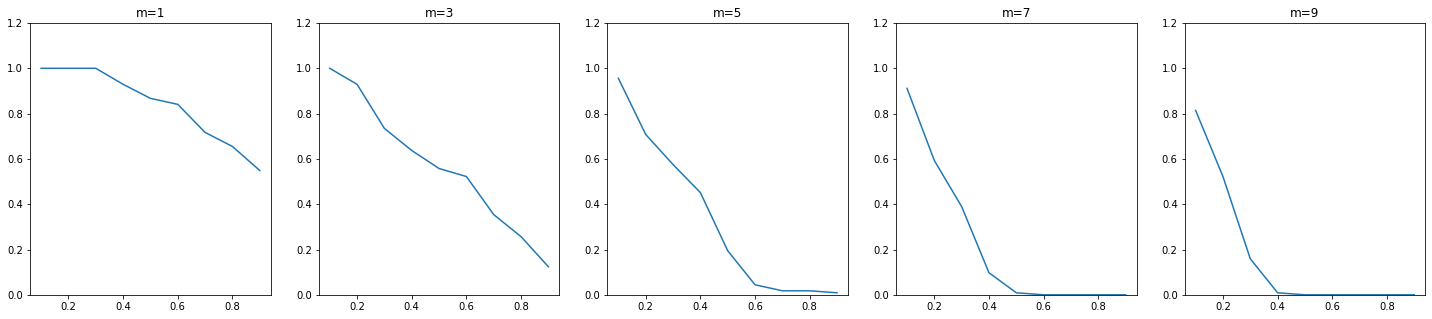

In [19]:
# パラメータチューニング
evaluate_results = {}
m_range = np.arange(1, 10, 2)

fig, ax = plt.subplots(1, len(m_range), figsize=(5*len(m_range), 5))

for i, m in enumerate(m_range):
    
    thr_range = np.arange(0.1, 1, 0.1)
    avg_results_per_m = np.array([])
    for thr in thr_range:
        result_means = np.array([])
        for name in f_list:
            focused_data = df[df['data_name']==name]
            data = standardize_data(focused_data['add'])

            # パラメータ：安定とみなす変化の閾値
            trig_data, ref_data = detect_trigger1(data, m, thr)

            switch_time = [k+1 for k, p in enumerate(np.diff(focused_data['light'].values)) if p != 0]
            
            
            result_means = np.append(result_means, evaluate_detecting_trigger(trig_data, switch_time))

        avg_results_per_m = np.append(avg_results_per_m, np.mean(result_means))
    ax[i].set_title(f"m={m}")
    ax[i].set_ylim(0, 1.2)
    ax[i].plot(thr_range, avg_results_per_m)
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


case1_1.csv の評価： [0 0 1 0 1 1 0 0 1 0] 0.4
case1_2.csv の評価： [0 0 1 0 1 1 0 0 1 0] 0.4
case1_3.csv の評価： [0 0 0 0 1 1 1 1 1 0] 0.5
case3_1.csv の評価： [0 1 0 0 0 0 1 1 1 0 1] 0.45454545454545453
case3_2.csv の評価： [1 1 0 0 0 1 1 1 0 0 0] 0.45454545454545453
case3_3.csv の評価： [1 1 0 0 0 1 1 1 1 0 1] 0.6363636363636364
case4_1.csv の評価： [1 1 0 0 1 1 0 1 0 0] 0.5
case4_2.csv の評価： [1 1 0 0 1 1 1 1 0 0] 0.6
case4_3.csv の評価： [1 1 0 0 1 1 1 1 0 0] 0.6
case4_4.csv の評価： [1 1 0 0 1 1 1 1 0 0] 0.6
case4_5.csv の評価： [1 1 0 0 1 1 1 1 0 0] 0.6


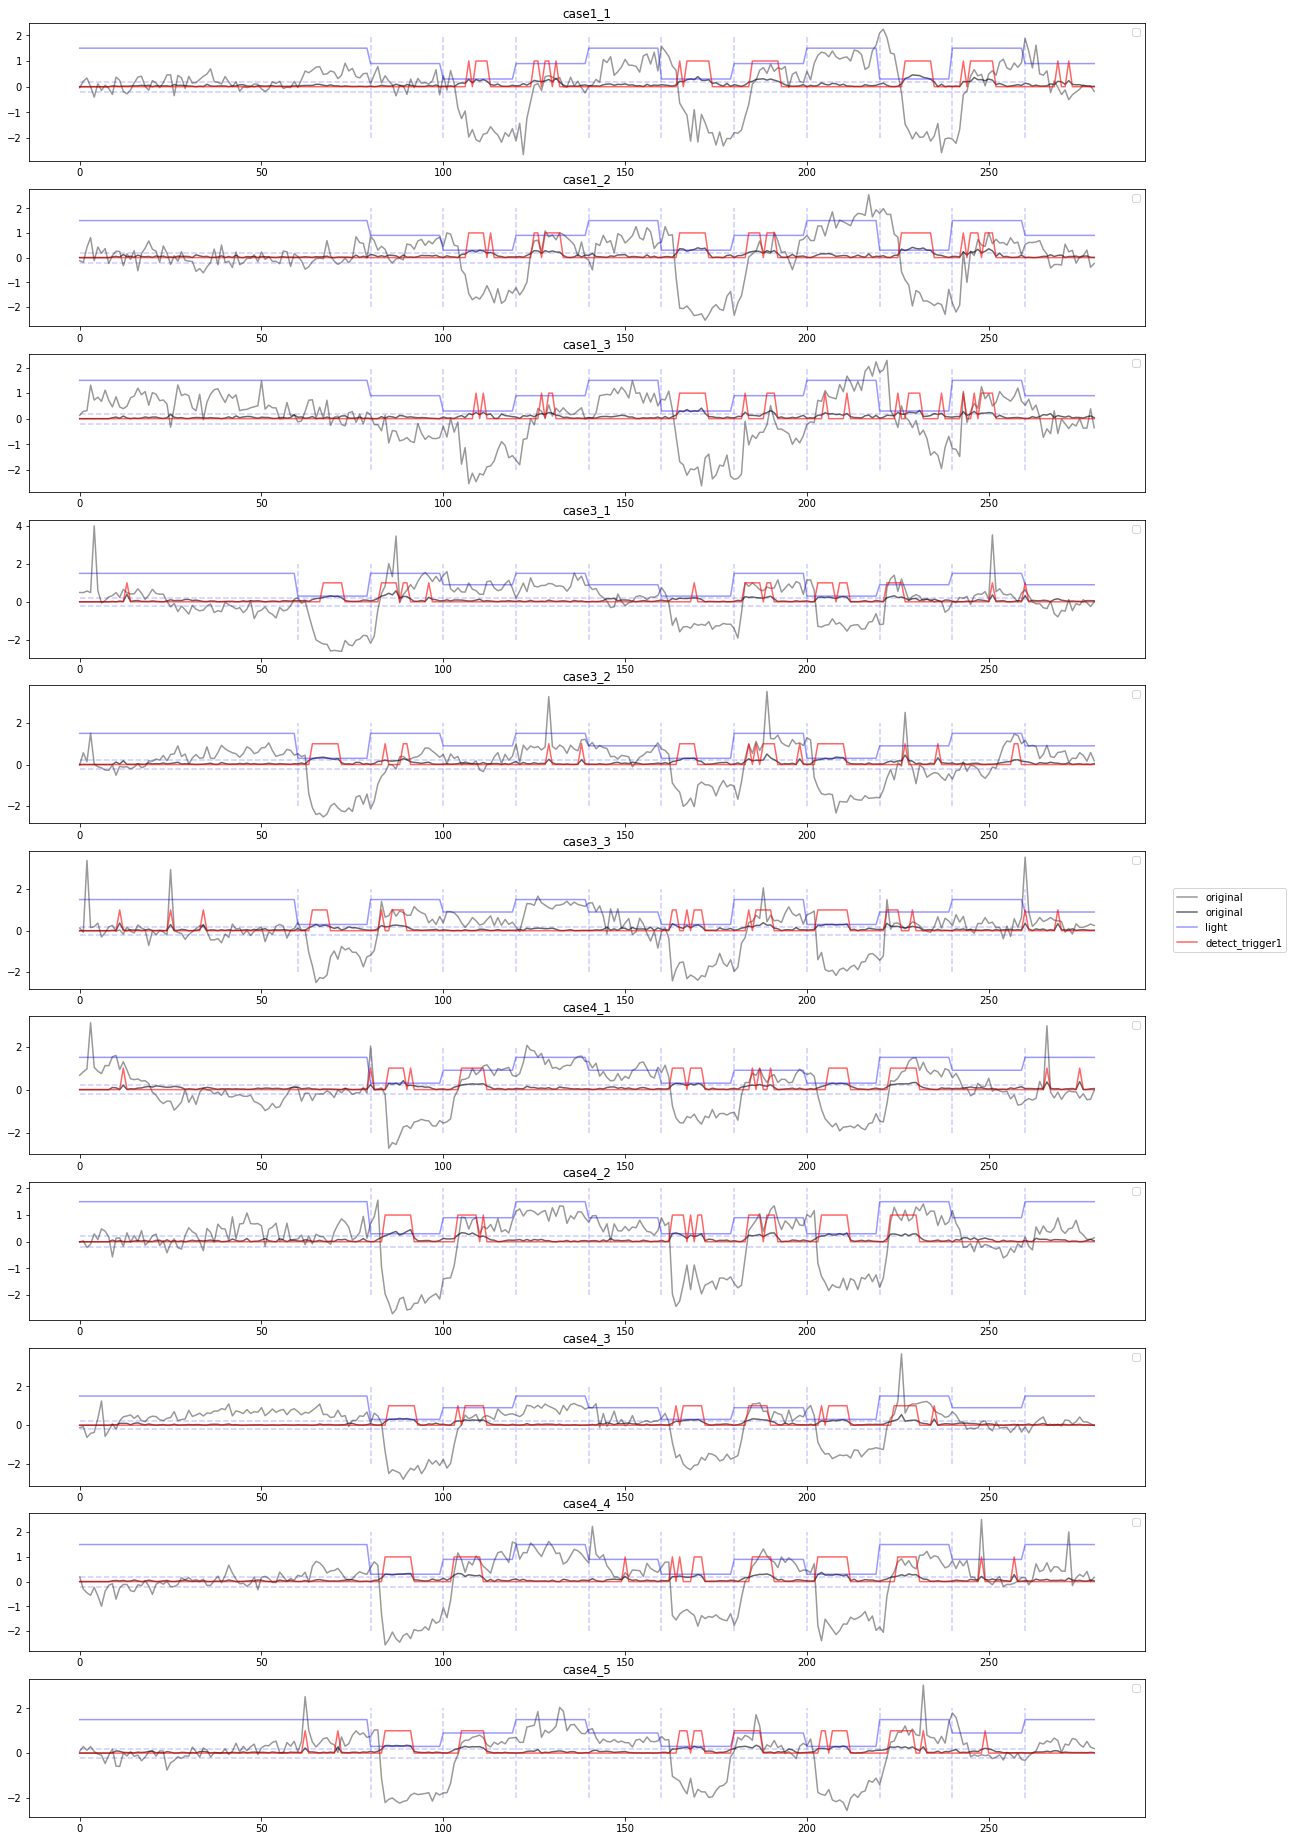

In [20]:
fig, ax = plt.subplots(len(f_dict), 1, figsize=(20,3 * len(f_dict)))
for i, n in enumerate(f_dict):
    ax[i].set_title(f_dict[n])
    ax[i].legend()

m1 = 9
thr1 = 0.2
    
evaluate_results = np.array([])
for i, name in enumerate(f_list):
    focused_data = df[df['data_name']==name]
    data = standardize_data(focused_data['add'])

    trig_data, ref_data = detect_trigger1(data, m1, thr1)

    switch_time = [j+1 for j, p in enumerate(np.diff(focused_data['light'].values)) if p != 0]

    evaluate_result = evaluate_detecting_trigger(trig_data, switch_time)
    np.append(evaluate_results, evaluate_result)
    print(name, 'の評価：', evaluate_result, evaluate_result[evaluate_result==1].shape[0] / evaluate_result.shape[0])

    ax[i].vlines(switch_time, -2, 2, "blue", alpha=0.2, linestyles='dashed')
    ax[i].hlines([thr1, -thr1], 0, 260, "blue", alpha=0.2, linestyles='dashed')
    ax[i].plot(data, color='black', alpha=0.4, label="original")
    ax[i].plot(ref_data, color='black', alpha=0.6, label="original")
    ax[i].plot(focused_data['light'] / 100, color="blue", alpha=0.4, label="light")
    ax[i].plot(trig_data, color='red', alpha=0.6, label="detect_trigger1")
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc = 'center right')
plt.show()

#### アルゴリズム2の評価

##### バラバラ

/Users/kousuke/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan nan nan]
[nan nan nan nan]
[nan nan nan nan]
[nan nan nan nan]
[nan nan nan nan nan nan]
[nan nan nan nan nan nan]
[nan nan nan nan nan nan]
[nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan]


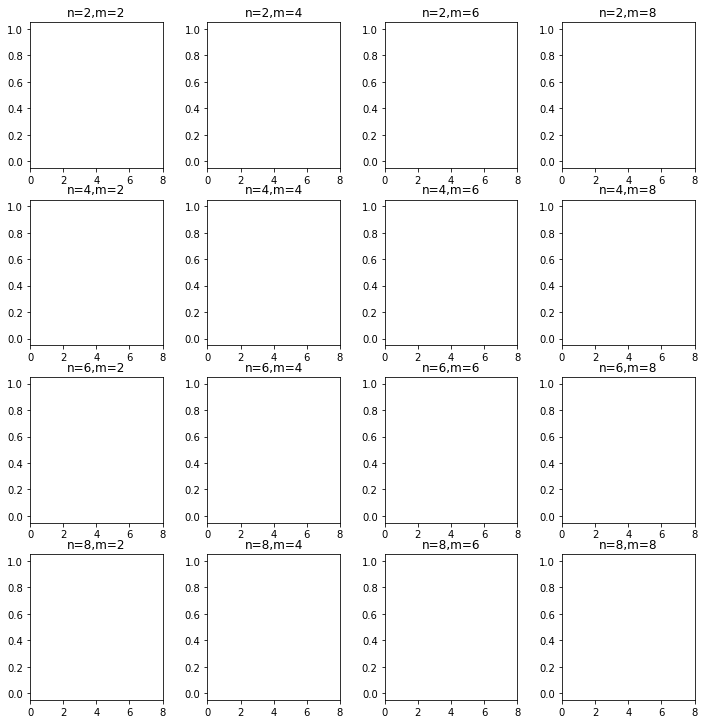

[nan nan nan nan nan nan nan nan]


In [78]:
n_range = np.arange(2, 10, 2)
m_range = np.arange(2, 10, 2)


fig, ax = plt.subplots(len(n_range), len(m_range), figsize=(10,10))
fig.tight_layout()

# 各種テンプレート作成
for h, n in enumerate(n_range):
    for w, m in enumerate(m_range):
        convergence_template = create_convergence_template(df, n, m, (2, 0))
        print(convergence_template)
        
        ax[h,w].set_title(f'n={n},m={m}')
        ax[h,w].set_xlim(0, n_range.shape[0]*2)
        ax[h,w].plot(convergence_template)

plt.show()
print(convergence_template)

##### ごちゃ混ぜ

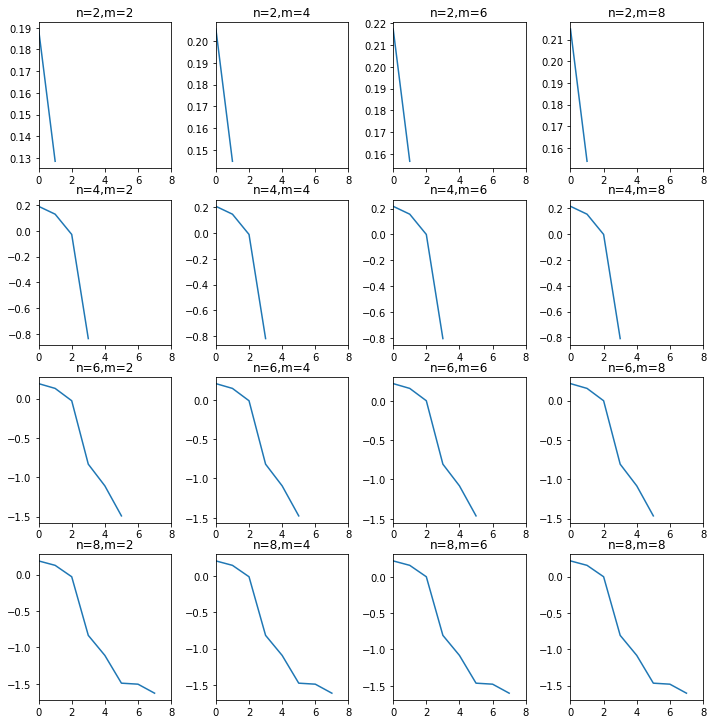

[ 0.21484341  0.15394733 -0.00280647 -0.80882051 -1.08439616 -1.46590405
 -1.47966774 -1.60356515]


In [53]:
n_range = np.arange(2, 10, 2)
m_range = np.arange(2, 10, 2)


fig, ax = plt.subplots(len(n_range), len(m_range), figsize=(10,10))
fig.tight_layout()

# 各種テンプレート作成
for h, n in enumerate(n_range):
    for w, m in enumerate(m_range):
        convergence_template = create_convergence_template(df, n, m)
        
        ax[h,w].set_title(f'n={n},m={m}')
        ax[h,w].set_xlim(0, n_range.shape[0]*2)p
        ax[h,w].plot(convergence_template)

plt.show()
print(convergence_template)

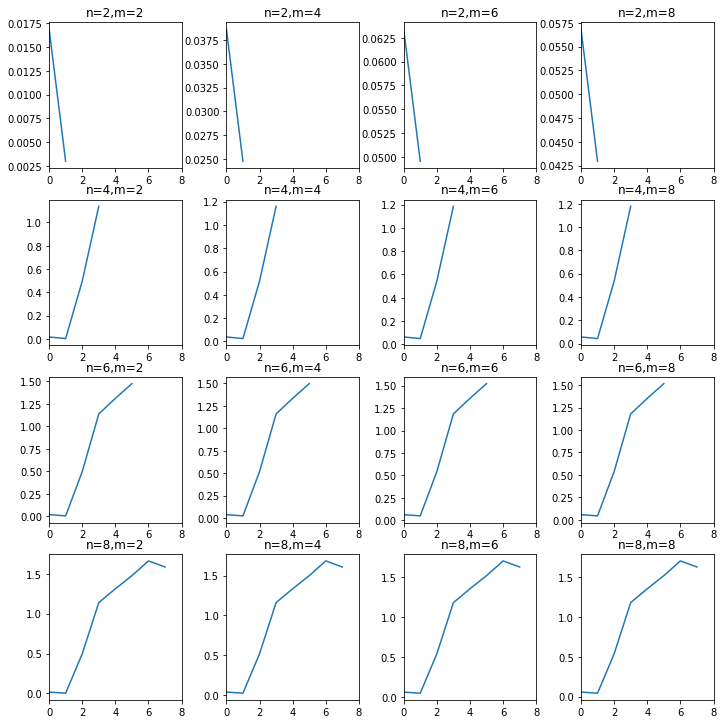

In [54]:
n_range = np.arange(2, 10, 2)
m_range = np.arange(2, 10, 2)


fig, ax = plt.subplots(len(n_range), len(m_range), figsize=(10,10))
fig.tight_layout()

# 各種テンプレート作成
for h, n in enumerate(n_range):
    for w, m in enumerate(m_range):
        divergence_template = create_divergence_template(df, n, m)
        
        ax[h,w].set_title(f'n={n},m={m}')
        ax[h,w].set_xlim(0, n_range.shape[0]*2)
        ax[h,w].plot(divergence_template)

plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


case1_1.csv の評価（輻輳）： [1 1 1 1 1] 1.0
case1_1.csv の評価（開散）： [1 1 1 1 1] 1.0

case1_2.csv の評価（輻輳）： [1 1 1 1 1] 1.0
case1_2.csv の評価（開散）： [1 1 1 1 1] 1.0

case1_3.csv の評価（輻輳）： [1 1 1 1 1] 1.0
case1_3.csv の評価（開散）： [1 1 1 1 1] 1.0

case3_1.csv の評価（輻輳）： [1 1 1 1 1 1] 1.0
case3_1.csv の評価（開散）： [1 1 1 1 1] 1.0

case3_2.csv の評価（輻輳）： [1 1 1 1 1 1] 1.0
case3_2.csv の評価（開散）： [1 1 1 1 1] 1.0

case3_3.csv の評価（輻輳）： [1 1 1 1 1 1] 1.0
case3_3.csv の評価（開散）： [1 1 1 1 1] 1.0

case4_1.csv の評価（輻輳）： [1 1 1 1 1] 1.0
case4_1.csv の評価（開散）： [1 1 1 1 1] 1.0

case4_2.csv の評価（輻輳）： [1 1 1 1 1] 1.0
case4_2.csv の評価（開散）： [1 1 1 1 1] 1.0

case4_3.csv の評価（輻輳）： [1 1 1 1 1] 1.0
case4_3.csv の評価（開散）： [1 1 1 1 1] 1.0

case4_4.csv の評価（輻輳）： [1 1 1 1 1] 1.0
case4_4.csv の評価（開散）： [1 1 1 1 1] 1.0

case4_5.csv の評価（輻輳）： [1 1 1 1 1] 1.0
case4_5.csv の評価（開散）： [1 1 1 1 1] 1.0



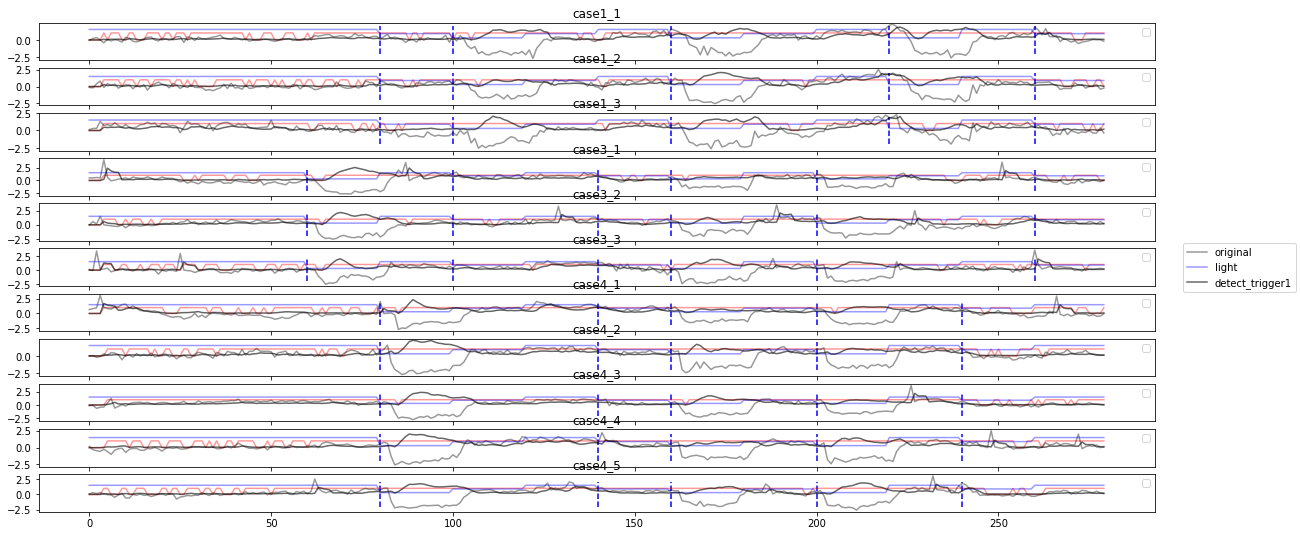

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


case1_1.csv の評価（輻輳）： [1 1 1 1 1] 1.0
case1_1.csv の評価（開散）： [1 1 1 1 1] 1.0

case1_2.csv の評価（輻輳）： [1 1 1 1 1] 1.0
case1_2.csv の評価（開散）： [1 1 1 1 1] 1.0

case1_3.csv の評価（輻輳）： [1 1 1 1 1] 1.0
case1_3.csv の評価（開散）： [1 1 1 1 1] 1.0

case3_1.csv の評価（輻輳）： [1 1 1 1 1 1] 1.0
case3_1.csv の評価（開散）： [1 1 1 1 1] 1.0

case3_2.csv の評価（輻輳）： [1 1 1 1 1 1] 1.0
case3_2.csv の評価（開散）： [1 1 1 1 1] 1.0

case3_3.csv の評価（輻輳）： [1 1 1 1 1 1] 1.0
case3_3.csv の評価（開散）： [1 1 1 1 1] 1.0

case4_1.csv の評価（輻輳）： [1 1 1 1 1] 1.0
case4_1.csv の評価（開散）： [1 1 1 1 1] 1.0

case4_2.csv の評価（輻輳）： [1 1 1 1 1] 1.0
case4_2.csv の評価（開散）： [1 1 1 1 1] 1.0

case4_3.csv の評価（輻輳）： [1 1 1 1 1] 1.0
case4_3.csv の評価（開散）： [1 1 1 1 1] 1.0

case4_4.csv の評価（輻輳）： [1 1 1 1 1] 1.0
case4_4.csv の評価（開散）： [1 1 1 1 1] 1.0

case4_5.csv の評価（輻輳）： [1 1 1 1 1] 1.0
case4_5.csv の評価（開散）： [1 1 1 1 1] 1.0



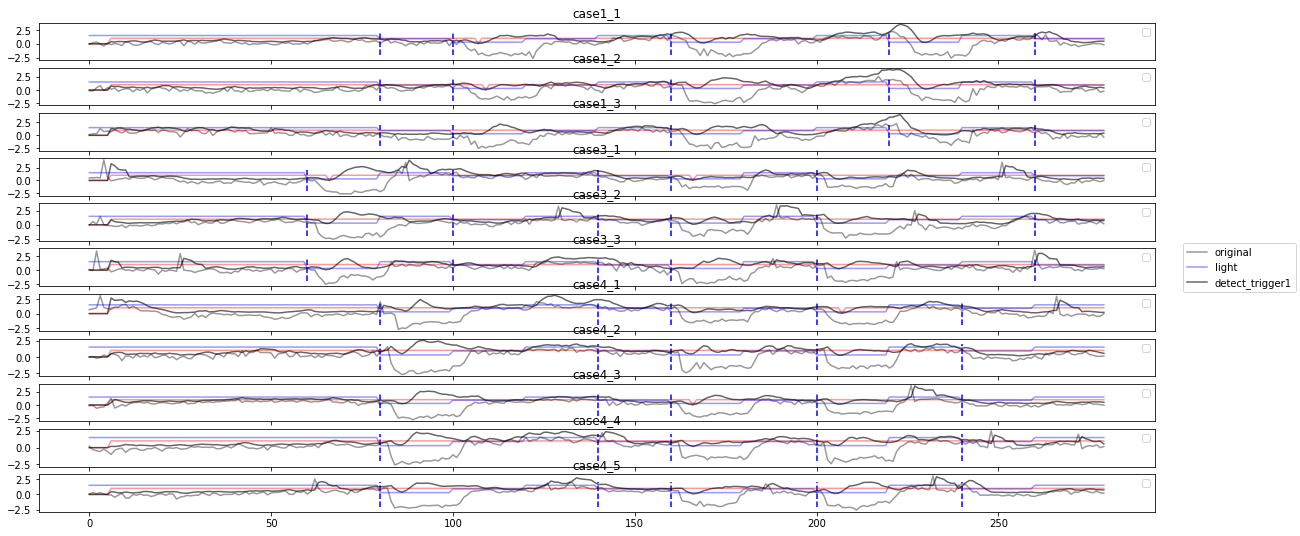

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


case1_1.csv の評価（輻輳）： [1 1 1 1 1] 1.0
case1_1.csv の評価（開散）： [1 1 1 1 1] 1.0

case1_2.csv の評価（輻輳）： [1 1 1 1 1] 1.0
case1_2.csv の評価（開散）： [1 1 1 1 1] 1.0

case1_3.csv の評価（輻輳）： [1 1 1 1 1] 1.0
case1_3.csv の評価（開散）： [1 1 1 1 1] 1.0

case3_1.csv の評価（輻輳）： [1 1 1 1 1 1] 1.0
case3_1.csv の評価（開散）： [1 1 1 1 1] 1.0

case3_2.csv の評価（輻輳）： [1 1 1 1 1 1] 1.0
case3_2.csv の評価（開散）： [1 1 1 1 1] 1.0

case3_3.csv の評価（輻輳）： [1 1 1 1 1 1] 1.0
case3_3.csv の評価（開散）： [1 1 1 1 1] 1.0

case4_1.csv の評価（輻輳）： [1 1 1 1 1] 1.0
case4_1.csv の評価（開散）： [1 1 1 1 1] 1.0

case4_2.csv の評価（輻輳）： [1 1 1 1 1] 1.0
case4_2.csv の評価（開散）： [1 1 1 1 1] 1.0

case4_3.csv の評価（輻輳）： [1 1 1 1 1] 1.0
case4_3.csv の評価（開散）： [1 1 1 1 1] 1.0

case4_4.csv の評価（輻輳）： [1 1 1 1 1] 1.0
case4_4.csv の評価（開散）： [1 1 1 1 1] 1.0

case4_5.csv の評価（輻輳）： [1 1 1 1 1] 1.0
case4_5.csv の評価（開散）： [1 1 1 1 1] 1.0



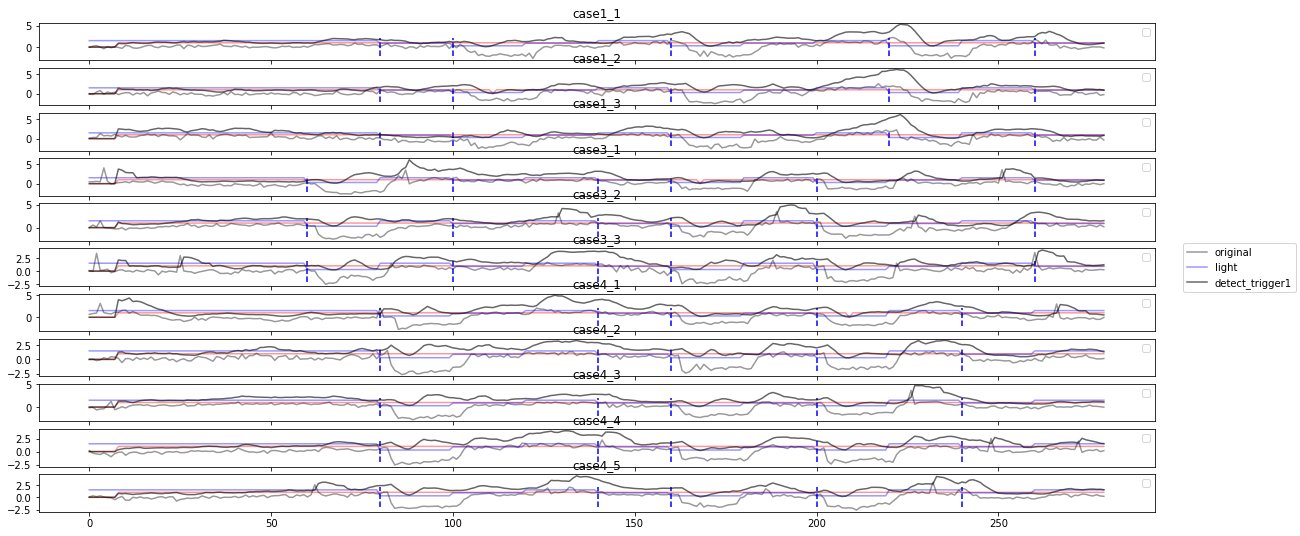

In [83]:
# 定数周り

n_m_convergence = np.arange(4, 10, 2)
thr_convergence = 0.8

for n in n_m_convergence:
    fig, ax = plt.subplots(len(f_dict), 1, figsize=(20,3 * n_m_convergence.shape[0]))
    for i, name in enumerate(f_dict):
        ax[i].set_title(f_dict[name])
        ax[i].legend()

    convergence_template = create_convergence_template(df, n, n)

    for i, name in enumerate(f_list):
        focused_data = df[df['data_name']==name]
        data = standardize_data(focused_data['add'])

        trig_data, ref = detect_trigger2(data, convergence_template, n, thr_convergence)

        divergence_switch_time = [j+1 for j, p in enumerate(np.diff(focused_data['light'].values)) if p != 0 and focused_data['light'][j+1] - focused_data['light'][j] > 0]
        convergence_switch_time = [j+1 for j, p in enumerate(np.diff(focused_data['light'].values)) if p != 0 and focused_data['light'][j+1] - focused_data['light'][j] < 0]

        evaluate_result = evaluate_detecting_trigger(trig_data, convergence_switch_time)
        print(name, 'の評価（輻輳）：', evaluate_result, evaluate_result[evaluate_result==1].shape[0] / evaluate_result.shape[0])
        evaluate_result = evaluate_detecting_trigger(trig_data, divergence_switch_time)
        print(name, 'の評価（開散）：', evaluate_result, evaluate_result[evaluate_result==1].shape[0] / evaluate_result.shape[0])
        print()

        ax[i].vlines(convergence_switch_time, -2, 2, "blue", linestyles='dashed')
        ax[i].plot(trig_data, color="red", alpha=0.4)
#         ax[i].vlines(divergence_switch_time, -2, 2, "purple", linestyles='dashed')
        ax[i].plot(data, color='black', alpha=0.4, label="original")
        ax[i].plot(focused_data['light'] / 100, color="blue", alpha=0.4, label="light")
        ax[i].plot(ref/10, color='black', alpha=0.6, label="detect_trigger1")
    lines, labels = fig.axes[-1].get_legend_handles_labels()
    fig.legend(lines, labels, loc = 'center right')
    plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


[-2.11417994 -1.42564639 -2.64479589 -1.22038081] -1.9622863413297755 [-0.1518936   0.53663995 -0.68250955  0.74190553]
[0.02072921 0.06743609 0.28128406 0.176869  ] 0.0682153488319497 [-0.04748614 -0.00077926  0.21306871  0.10865365]
[-1.78426047 -1.81107402 -1.68733017 -1.16169693] -2.027562152079876 [0.24330168 0.21648813 0.34023198 0.86586522]
[0.59516039 0.2684192  0.91201582 1.22115228] 0.42246250310726324 [ 0.17269789 -0.1540433   0.48955332  0.79868977]
[-2.04208957 -2.20550575 -1.66595907 -0.30567112] -2.0109790192940955 [-0.03111056 -0.19452673  0.34501995  1.7053079 ]
[-1.22072516 -1.51206708 -1.30631491 -0.98812241] -1.6407553702861104 [0.42003021 0.12868829 0.33444046 0.65263296]
[-0.11102183 -0.499323    0.57192666  0.48819197] 0.4016573513313432 [-0.51267918 -0.90098035  0.17026931  0.08653462]
[-2.33879566 -1.82867393 -1.54307907 -0.79193925] -1.9279250429708004 [-0.41087062  0.09925111  0.38484597  1.1359858 ]
[0.90028718 0.69035053 0.68898286 1.28123972] 0.05542021563

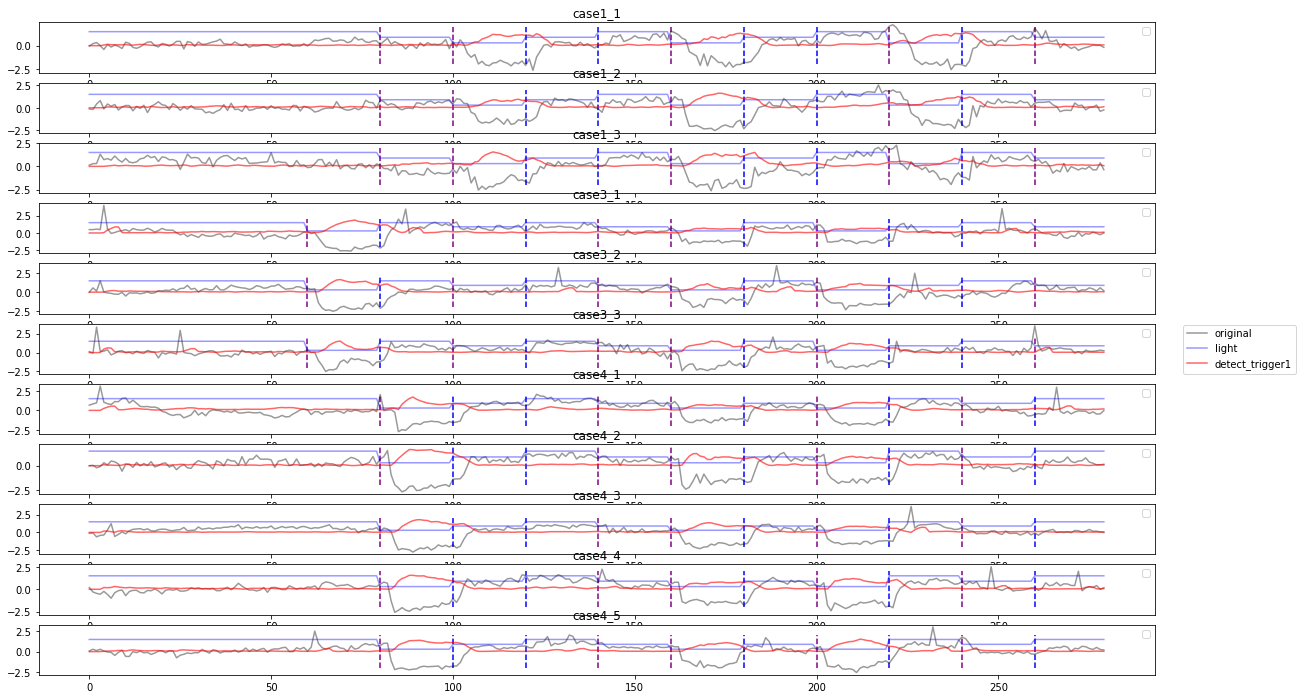

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


[-2.11417994 -1.42564639 -2.64479589 -1.22038081 -0.58307427  0.05412195] -1.9039685089833742 [-0.21021143  0.47832212 -0.74082738  0.6835877   1.32089424  1.95809046]
[0.02072921 0.06743609 0.28128406 0.176869   1.05962516 0.93786718] 0.11165836616735578 [-0.09092916 -0.04422227  0.16962569  0.06521063  0.94796679  0.82620881]
[-1.78426047 -1.81107402 -1.68733017 -1.16169693 -0.68675672  0.10638402] -2.028880882116808 [0.24462041 0.21780686 0.34155071 0.86718395 1.34212416 2.13526491]
[0.59516039 0.2684192  0.91201582 1.22115228 1.34663187 1.30466465] 0.4052692504913889 [ 0.18989114 -0.13685005  0.50674657  0.81588302  0.94136262  0.8993954 ]
[-2.04208957 -2.20550575 -1.66595907 -0.30567112 -0.16658695  0.40796316] -2.014638837771636 [-0.02745074 -0.19086691  0.34867977  1.70896772  1.84805188  2.422602  ]
[-1.22072516 -1.51206708 -1.30631491 -0.98812241  0.16383832  0.67446148] -1.6019924601268911 [0.3812673  0.08992538 0.29567755 0.61387005 1.76583078 2.27645394]
[-0.11102183 -0.499

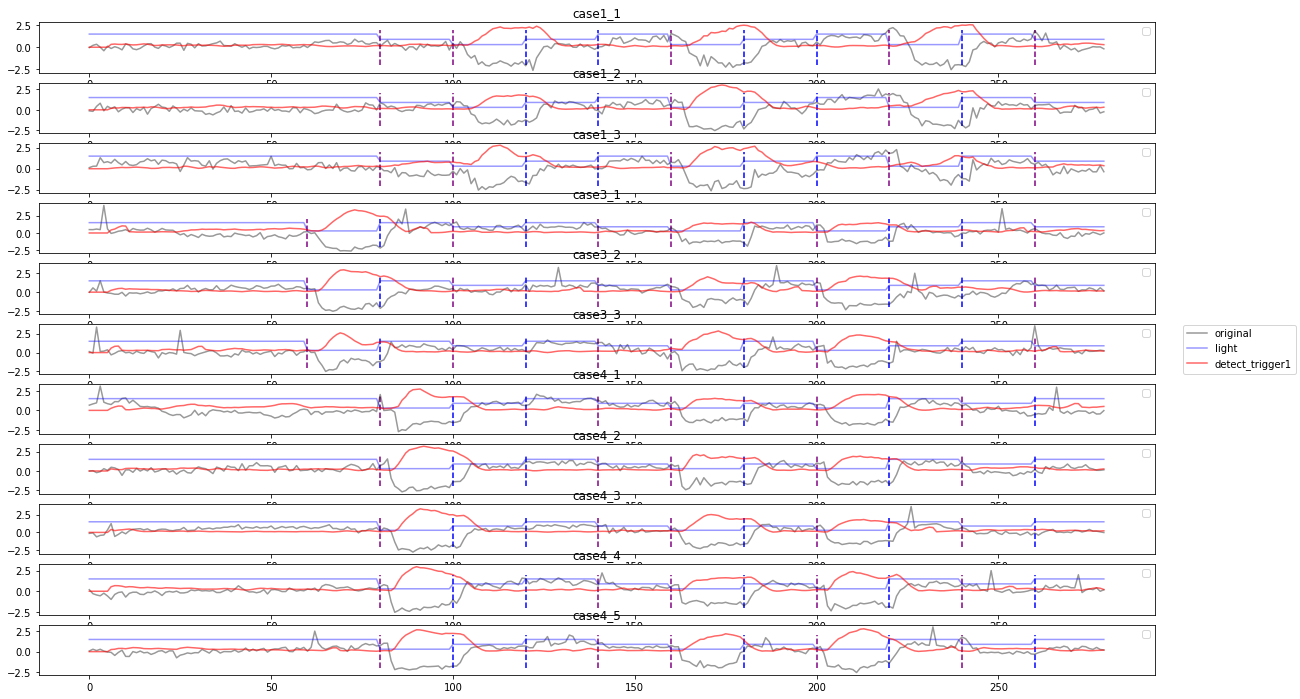

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


[-2.11417994 -1.42564639 -2.64479589 -1.22038081 -0.58307427  0.05412195
  0.12209599 -0.14485835] -1.841098848232431 [-0.27308109  0.41545245 -0.80369705  0.62071804  1.25802458  1.8952208
  1.96319484  1.6962405 ]
[0.02072921 0.06743609 0.28128406 0.176869   1.05962516 0.93786718
 1.16750201 0.44289631] 0.13108298148923578 [-0.11035377 -0.06364689  0.15020108  0.04578602  0.92854217  0.8067842
  1.03641903  0.31181333]
[-1.78426047 -1.81107402 -1.68733017 -1.16169693 -0.68675672  0.10638402
  0.24691741  0.63837154] -1.9067757327931545 [0.12251526 0.09570171 0.21944556 0.7450788  1.22001901 2.01315976
 2.15369315 2.54514728]
[0.59516039 0.2684192  0.91201582 1.22115228 1.34663187 1.30466465
 1.16255625 1.38869191] 0.4919619897277671 [ 0.1031984  -0.22354279  0.42005383  0.72919029  0.85466988  0.81270266
  0.67059426  0.89672992]
[-2.04208957 -2.20550575 -1.66595907 -0.30567112 -0.16658695  0.40796316
  0.66526328  0.42129559] -1.9686789400113902 [-0.07341063 -0.23682681  0.30271987 

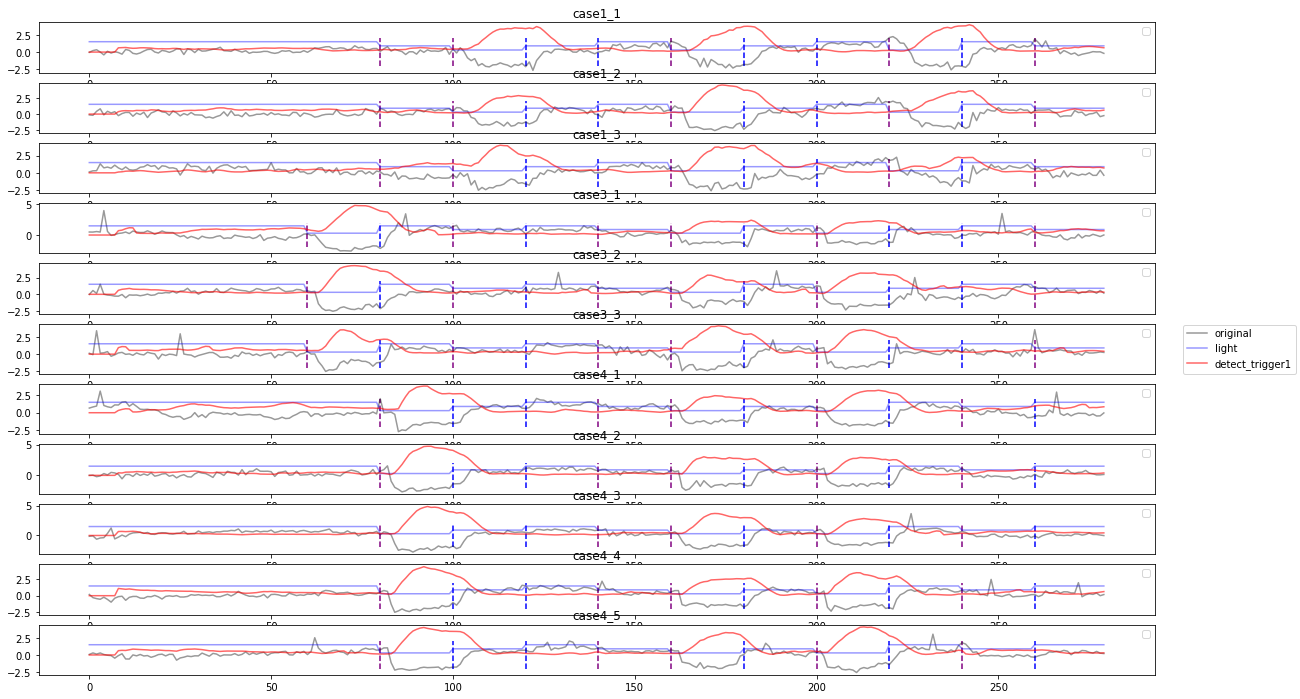

In [51]:
# 定数周り
n_m_divergence = np.arange(2, 10, 2)
thr_divergence = 10

for n in np.arange(4, 10, 2):
    fig, ax = plt.subplots(len(f_dict), 1, figsize=(20,3 * n_m_divergence.shape[0]))
    for i, name in enumerate(f_dict):
        ax[i].set_title(f_dict[name])
        ax[i].legend()

    divergence_template = create_divergence_template(df, n, n)

    for i, name in enumerate(f_list):
        focused_data = df[df['data_name']==name]
        data = standardize_data(focused_data['add'])

        trig_data, ref = detect_trigger2(data, divergence_template, thr_divergence)

        convergence_switch_time = [j+1 for j, p in enumerate(np.diff(focused_data['light'].values)) if p != 0 and focused_data['light'][j+1] - focused_data['light'][j] > 0]
        divergence_switch_time = [j+1 for j, p in enumerate(np.diff(focused_data['light'].values)) if p != 0 and focused_data['light'][j+1] - focused_data['light'][j] < 0]

        evaluate_result = evaluate_detecting_trigger(trig_data, convergence_switch_time)
        print(name, 'の評価（輻輳）：', evaluate_result, evaluate_result[evaluate_result==1].shape[0] / evaluate_result.shape[0])
        evaluate_result = evaluate_detecting_trigger(trig_data, divergence_switch_time)
        print(name, 'の評価（開散）：', evaluate_result, evaluate_result[evaluate_result==1].shape[0] / evaluate_result.shape[0])
        print()

        ax[i].vlines(convergence_switch_time, -2, 2, "blue", linestyles='dashed')
        ax[i].vlines(divergence_switch_time, -2, 2, "purple", linestyles='dashed')
        ax[i].plot(data, color='black', alpha=0.4, label="original")
        ax[i].plot(focused_data['light'] / 100, color="blue", alpha=0.4, label="light")
        ax[i].plot(ref / 20, color='red', alpha=0.6, label="detect_trigger1")
    lines, labels = fig.axes[-1].get_legend_handles_labels()
    fig.legend(lines, labels, loc = 'center right')
    plt.show()

#### 平均値と現在の値の比較による方法

/Users/kousuke/.pyenv/versions/3.7.1/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/kousuke/.pyenv/versions/3.7.1/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


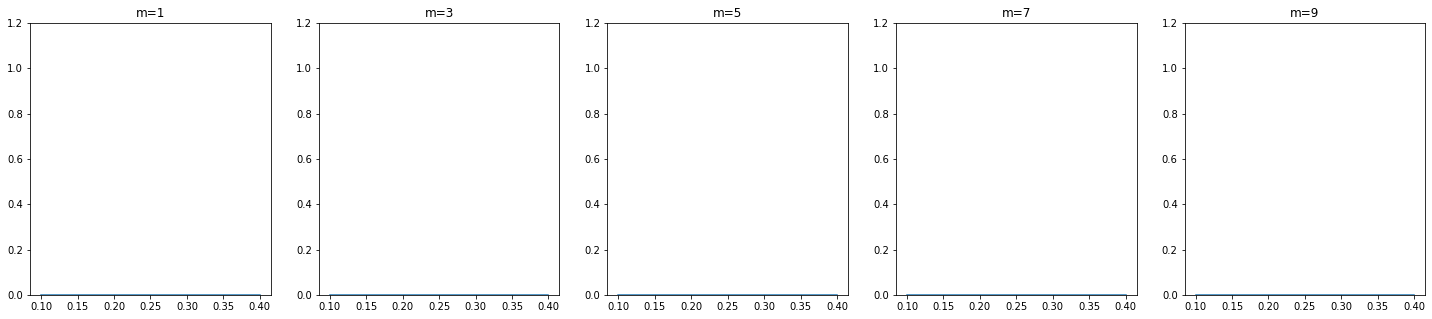

In [25]:
# パラメータチューニング
evaluate_results = {}
m_range = np.arange(1, 10, 2)

fig, ax = plt.subplots(1, len(m_range), figsize=(5*len(m_range), 5))

for i, m in enumerate(m_range):
    
    thr_range = np.arange(0.1, 0.4, 0.05)
    avg_results_per_m = np.array([])
    for thr in thr_range:
        result_means = np.array([])
        for name in f_list:
            focused_data = df[df['data_name']==name]
            data = standardize_data(focused_data['add'])

            # パラメータ：安定とみなす変化の閾値
            trig_data = detect_trigger_by_comparison_crr_and_avg(data, m, thr)

            switch_time = [k+1 for k, p in enumerate(np.diff(focused_data['light'].values)) if p != 0]
            
            
            result_means = np.append(result_means, evaluate_detecting_trigger(detect_trigger1(data, m, thr), switch_time))
        avg_results_per_m = np.append(avg_results_per_m, np.mean(result_means))
    ax[i].set_title(f"m={m}")
    ax[i].set_ylim(0, 1.2)
    ax[i].plot(thr_range, avg_results_per_m)
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


case1_1.csv の評価： [1 1 1 1 1 1 1 1 1 1] 1.0
case1_2.csv の評価： [1 1 1 1 1 1 1 1 1 1] 1.0
case1_3.csv の評価： [1 1 1 1 1 1 1 1 1 1] 1.0
case3_1.csv の評価： [1 1 1 1 1 1 1 1 1 1 1] 1.0
case3_2.csv の評価： [1 1 1 1 1 1 1 1 1 1 1] 1.0
case3_3.csv の評価： [1 1 1 1 1 1 1 1 1 1 1] 1.0
case4_1.csv の評価： [1 1 1 1 1 1 1 1 1 1] 1.0
case4_2.csv の評価： [1 1 1 1 1 1 1 1 1 1] 1.0
case4_3.csv の評価： [1 1 1 1 1 1 1 1 1 1] 1.0
case4_4.csv の評価： [1 1 1 1 1 1 1 1 1 1] 1.0
case4_5.csv の評価： [1 1 1 1 1 1 1 1 1 1] 1.0


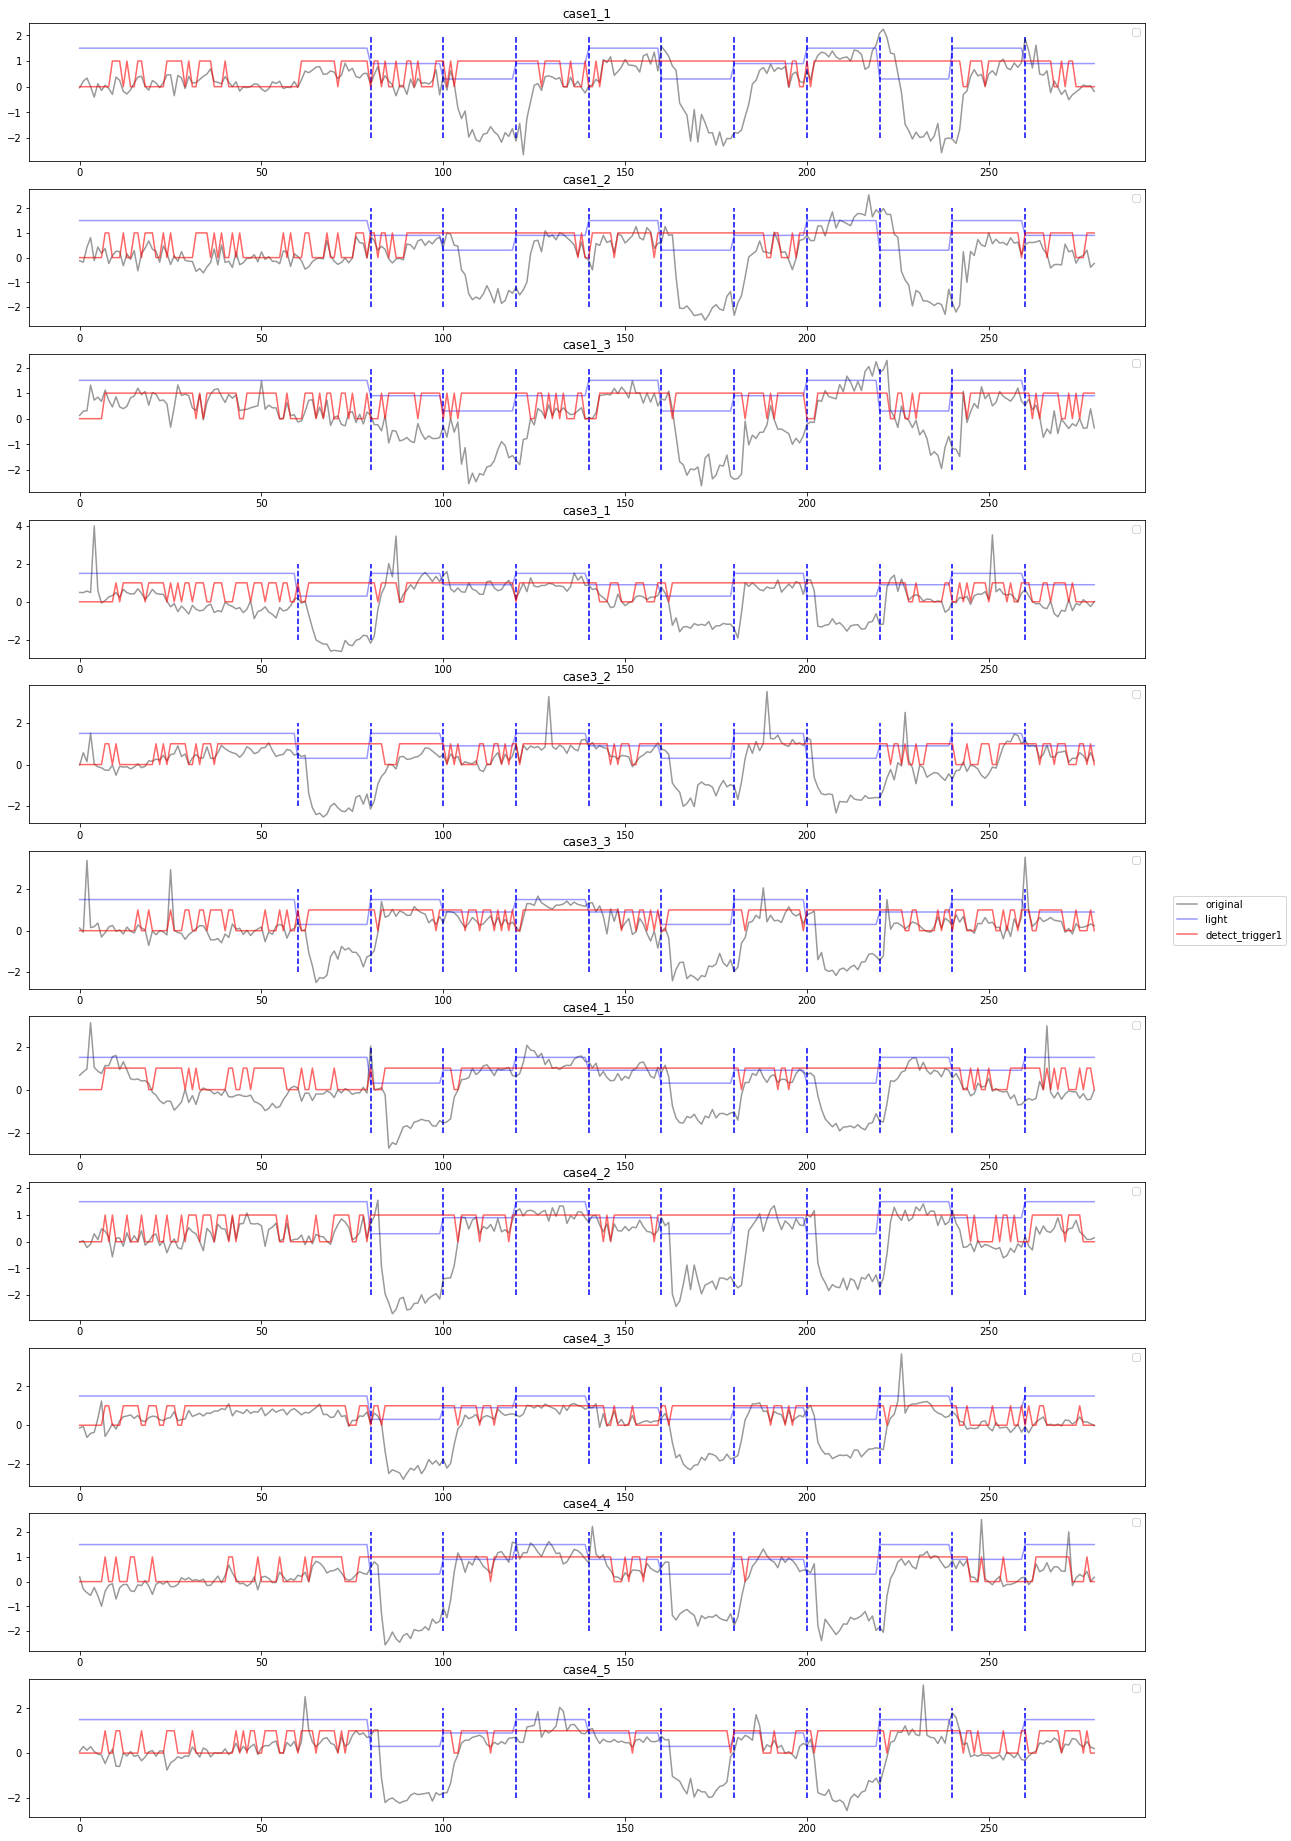

In [26]:
fig, ax = plt.subplots(len(f_dict), 1, figsize=(20,3 * len(f_dict)))
for i, n in enumerate(f_dict):
    ax[i].set_title(f_dict[n])
    ax[i].legend()


evaluate_results = np.array([])

for i, name in enumerate(f_list):
    focused_data = df[df['data_name']==name]
    data = standardize_data(focused_data['add'])

    trig_data = detect_trigger_by_comparison_crr_and_avg(data, 7, 0.25)

    switch_time = [j+1 for j, p in enumerate(np.diff(focused_data['light'].values)) if p != 0]

    evaluate_result = evaluate_detecting_trigger(trig_data, switch_time)
    np.append(evaluate_results, evaluate_result)
    print(name, 'の評価：', evaluate_result, evaluate_result[evaluate_result==1].shape[0] / evaluate_result.shape[0])

    ax[i].vlines(switch_time, -2, 2, "blue", linestyles='dashed')
    ax[i].plot(data, color='black', alpha=0.4, label="original")
    ax[i].plot(focused_data['light'] / 100, color="blue", alpha=0.4, label="light")
    ax[i].plot(trig_data, color='red', alpha=0.6, label="detect_trigger1")
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc = 'center right')
plt.show()

# 旧コード

In [27]:
# 瞬きの検知
def detect_blink(data):
    integrated_data_add = data['add'].rolling(window_size).sum() / window_size # addの部分和
    data_mean_add=integrated_data_add.mean()  # addの部分和平均
    
    integrated_data_sub = data['sub'].rolling(window_size).sum() / window_size  # subの部分和
    
    integrated_data_add = integrated_data_add.where(np.abs(integrated_data_sub) < right_left_threshold, 0)

    t = -1
    blink = np.zeros(len(data['add'].values))
    vergence = np.zeros(len(data['add'].values))
    cnt = 0
    
    prev_diff = 0
    for i, x in enumerate(integrated_data_add):
        if i <= 1:
            continue
            
        # フラグが立っていない時
        if t == -1:
            # なんでもないとき→integrated_data_addの変化が小さい時、かつフラグが立っていない時
            if abs(x - integrated_data_add[i-1]) < stable_threshold:
                continue

            # 立ち上がりを検知した時
            else:
                t = i - 1
                cnt += 1
                prev_diff = x - integrated_data_add[i-1]

        # フラグが立っている時
        if t != -1:
            cnt += 1
            # 立ち上がりの変化中
            if abs(x - integrated_data_add[i-1]) > stable_threshold:
                # 変化の向きが逆向きに大きく変化した時→瞬きだと考えられる
                if prev_diff * (x - integrated_data_add[i-1]) < 0:
                    blink[t:t+cnt] = 1
                    t = -1
                    cnt = 0
                    prev_diff = 0
                prev_diff = x - integrated_data_add[i-1]
            # 安定してきた時
            else:
                # 持続時間が瞬きにかかる時間よりも長くなった時
                if cnt > blink_upper_time:
                    vergence[t:t+cnt] = 1
                    t = -1
                    cnt = 0
                    prev_diff = 0
                # 輻輳開散運動終了

    return blink, vergence

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


NameError: name 'window_size' is not defined

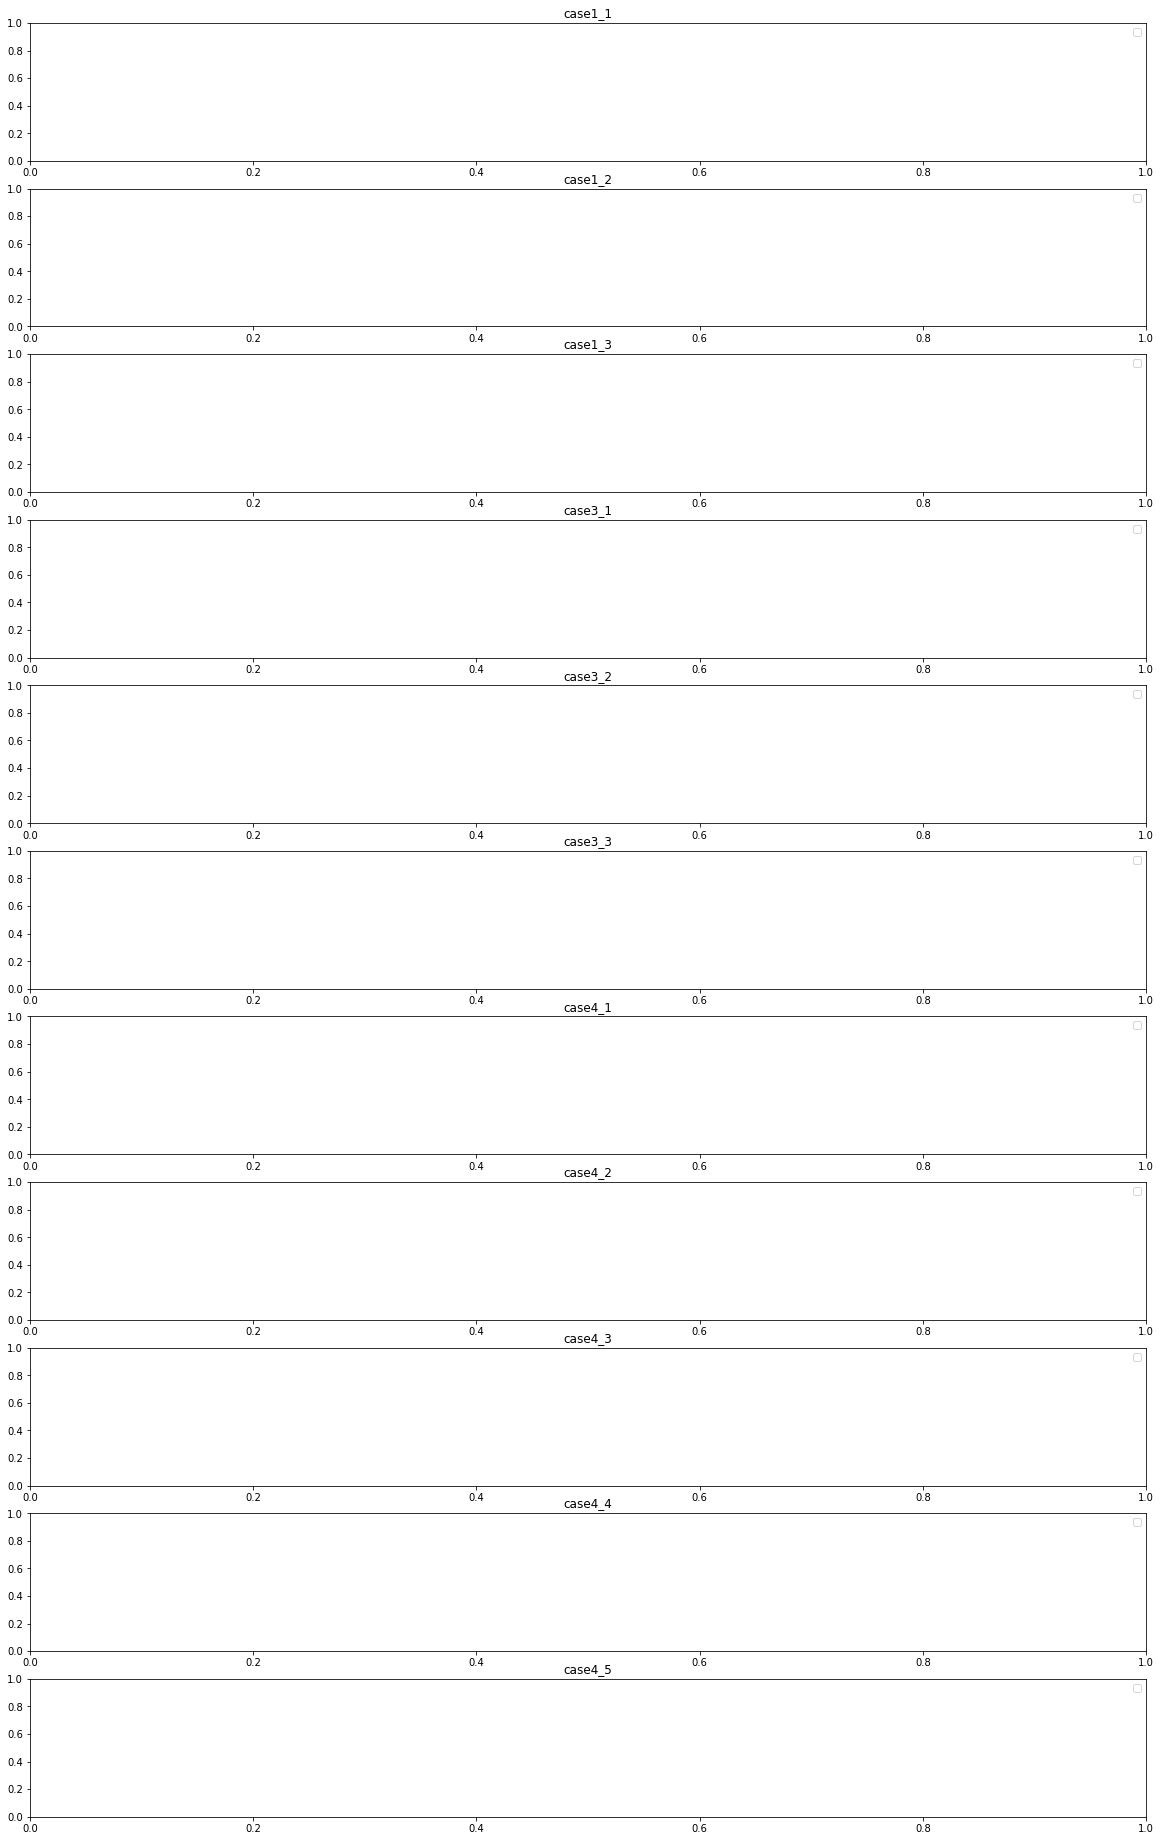

In [28]:
# 結果
# plt.figure(figsize=(20,5))
fig, ax = plt.subplots(len(f_dict), 1, figsize=(20,3 * len(f_dict)))
for i, n in enumerate(f_dict):
    ax[i].set_title(f_dict[n])
    ax[i].legend()
for i, name in enumerate(f_list):
    integrated_data_add = df[df['data_name']==name]['add'].rolling(window_size).sum() / window_size # addの部分和
    data_mean_add=integrated_data_add.mean()  # addの部分和平均
    
    integrated_data_sub = df[df['data_name']==name]['sub'].rolling(window_size).sum() / window_size  # subの部分和
    
    integrated_data_add = integrated_data_add.where(np.abs(integrated_data_sub) < right_left_threshold, 0)
    
    blink, vergence = detect_blink(df[df['data_name']==name])
    print(f_dict[name])
#     ax[i].plot(df[df['data_name']==name]['add'],color='black',alpha=0.6, label='measurement data')
    ax[i].plot(integrated_data_add,color='black',alpha=0.4, label='measurement data')
    ax[i].vlines(range(0, df[df['data_name']==name].shape[0], 20), -50, 50, "blue", linestyles='dashed')
    ax[i].plot(blink * 100, color='red', alpha=1, label='detected as blinking')
    ax[i].plot(vergence * 100, color='blue', alpha=1, label='detected as vergence')
    ax[i].plot(df[df['data_name']==name]['light'], linestyle="dashed", color='black', alpha=0.4, label='distance of light')
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc = 'center right')
plt.show()

In [ ]:
f_list_dash = ['case1_1.csv']
fig, ax = plt.subplots(2,2, figsize=(20,10))
ax[0, 0].set_title('stable')
ax[0, 1].set_title('blink')
ax[1, 0].set_title('left-right')
ax[1, 1].set_title('near-far')
for i, name in enumerate(f_list_dash):
    amp_data_add = np.sqrt(df[df['data_name']==name]['add']**2)
    integrated_data_add = amp_data_add.rolling(window_size).sum() / window_size
    data_mean_add=integrated_data_add.mean()
    
    amp_data_sub = np.sqrt(df[df['data_name']==name]['sub']**2)
    integrated_data_sub = amp_data_sub.rolling(window_size).sum() / window_size

    if i > 3: break
    print(name)
    ax[int(i / 2),int(i % 2)].plot(np.abs(integrated_data_add), label="add")
    ax[int(i / 2),int(i % 2)].plot(np.abs(integrated_data_sub), label="sub")
    ax[int(i / 2),int(i % 2)].set_ylim(-400, 400)

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc = 'upper center')
plt.show()